# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎìú?

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics.pairwise import cosine_similarity

font_path = '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc'
fontprop = fm.FontProperties(fname = font_path, size = 10)
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
submission = pd.read_csv("data/sample_submission.csv")

# Îç∞Ïù¥ÌÑ∞ EDA

## test

In [4]:
test.head(1)

ID Îß§Î¨ºÌôïÏù∏Î∞©Ïãù          Î≥¥Ï¶ùÍ∏à      ÏõîÏÑ∏  Ï†ÑÏö©Î©¥Ï†Å  Ìï¥ÎãπÏ∏µ   Ï¥ùÏ∏µ  Î∞©Ìñ•   Î∞©Ïàò  ÏöïÏã§Ïàò Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä  \
0  TEST_000   ÏÑúÎ•òÌôïÏù∏  223000000.0  530000   NaN  5.0  5.0  ÎÇ®Ìñ•  1.0  1.0    Î∂àÍ∞ÄÎä•   

   Ï¥ùÏ£ºÏ∞®ÎåÄÏàò  Í¥ÄÎ¶¨ÎπÑ       Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå Ï†úÍ≥µÌîåÎû´Ìèº         Í≤åÏû¨Ïùº  
0    NaN    7  Z86Th6S3K5  DÌîåÎû´Ìèº  2024-10-21

In [5]:
print("test ÎÑêÎç∞Ïù¥ÌÑ∞ Ïàò :")
test.isna().sum()

test ÎÑêÎç∞Ïù¥ÌÑ∞ Ïàò :


ID          0
Îß§Î¨ºÌôïÏù∏Î∞©Ïãù      0
Î≥¥Ï¶ùÍ∏à         0
ÏõîÏÑ∏          0
Ï†ÑÏö©Î©¥Ï†Å      184
Ìï¥ÎãπÏ∏µ        50
Ï¥ùÏ∏µ          2
Î∞©Ìñ•          0
Î∞©Ïàò          2
ÏöïÏã§Ïàò         2
Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä      0
Ï¥ùÏ£ºÏ∞®ÎåÄÏàò     175
Í¥ÄÎ¶¨ÎπÑ         0
Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå       0
Ï†úÍ≥µÌîåÎû´Ìèº       0
Í≤åÏû¨Ïùº         0
dtype: int64

In [6]:
# Í≤åÏû¨ÏùºÎ≥Ñ ÎπàÎèÑ Í≥ÑÏÇ∞
date_counts = test[['Í≤åÏû¨Ïùº', 'ÏõîÏÑ∏']]  # Í≤åÏû¨Ïùº Í∏∞Ï§Ä Ï†ïÎ†¨

date_counts

Í≤åÏû¨Ïùº      ÏõîÏÑ∏
0    2024-10-21  530000
1    2023-09-02  590000
2    2024-04-03  200000
3    2024-09-19  250000
4    2024-11-10  380000
..          ...     ...
608  2024-09-24  340000
609  2024-09-04  750000
610  2024-04-20  500000
611  2024-11-17  340000
612  2024-05-04  360000

[613 rows x 2 columns]

In [7]:
date_counts['Í≤åÏû¨Ïùº'] = pd.to_datetime(date_counts['Í≤åÏû¨Ïùº'])
date_counts["Í≤åÏû¨Ïõî"] = date_counts["Í≤åÏû¨Ïùº"].dt.to_period("M")
date_counts["Í≤åÏû¨Î∂ÑÍ∏∞"] = date_counts["Í≤åÏû¨Ïùº"].dt.to_period("Q")

test_Q_counts= date_counts["Í≤åÏû¨Î∂ÑÍ∏∞"].value_counts()
test_M_counts= date_counts["Í≤åÏû¨Ïõî"].value_counts()

test_Q_counts.index = test_Q_counts.index.astype(str)
test_M_counts.index = test_M_counts.index.astype(str)

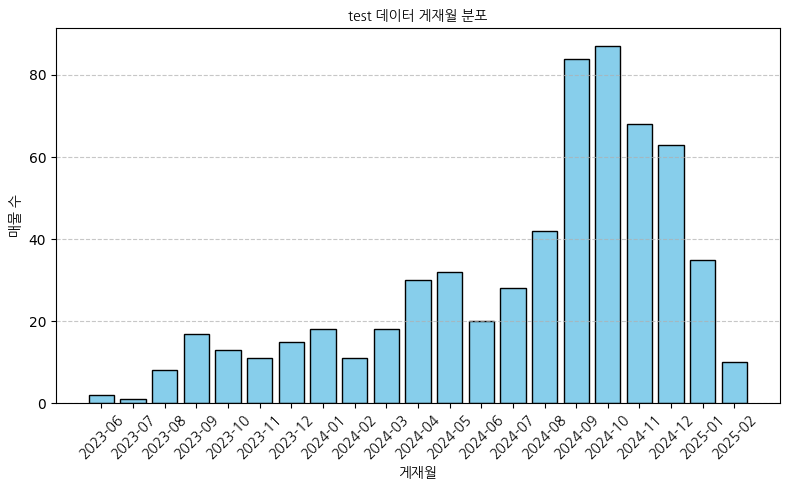

In [8]:
# Í≤åÏû¨Ïõî Ïù∏Îç±Ïä§Î•º Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò ÌõÑ Ï†ïÎ†¨
test_M_counts_sorted = test_M_counts.sort_index()

plt.figure(figsize=(8, 5))
plt.bar(test_M_counts_sorted.index, test_M_counts_sorted.values, color='skyblue', edgecolor="k")
plt.title("test Îç∞Ïù¥ÌÑ∞ Í≤åÏû¨Ïõî Î∂ÑÌè¨", fontsize=12, fontproperties=fontprop)
plt.xlabel("Í≤åÏû¨Ïõî", fontsize=10, fontproperties=fontprop)
plt.ylabel("Îß§Î¨º Ïàò", fontsize=10, fontproperties=fontprop)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)  # YÏ∂ïÏóêÎßå Ï†êÏÑ† Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.xticks(rotation=45, fontproperties=fontprop)
plt.tight_layout()
plt.show()

In [9]:
import matplotlib.pyplot as plt

# ÌóàÏúÑ Îß§Î¨º(`is_fake == 1`)Îßå ÌïÑÌÑ∞ÎßÅ
fake_listings_train = train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 1]

# Í≤åÏû¨ÏõîÎ≥Ñ Îß§Î¨º Í∞úÏàò ÏßëÍ≥Ñ
fake_M_counts_train = fake_listings_train["Í≤åÏû¨Ïõî"].value_counts()

# Í≤åÏû¨ÏõîÏùÑ Ï†ïÎ†¨ (Î¨∏ÏûêÏó¥ '1Ïõî', '2Ïõî' Îì±Ïùò ÌòïÏãùÏù¥Î©¥ Ïà´ÏûêÎ°ú Î≥ÄÌôò ÌõÑ Ï†ïÎ†¨)
fake_M_counts_train_sorted = fake_M_counts_train.reindex(
    sorted(fake_M_counts_train.index, key=lambda x: int(x.replace("Ïõî", "")))
)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.bar(fake_M_counts_train_sorted.index, fake_M_counts_train_sorted.values, color='salmon', edgecolor="k")
plt.title("Train Îç∞Ïù¥ÌÑ∞ ÌóàÏúÑ Îß§Î¨º Í≤åÏû¨Ïõî Î∂ÑÌè¨", fontsize=12, fontproperties=fontprop)
plt.xlabel("Í≤åÏû¨Ïõî", fontsize=10, fontproperties=fontprop)
plt.ylabel("Îß§Î¨º Ïàò", fontsize=10, fontproperties=fontprop)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45, fontproperties=fontprop)
plt.tight_layout()
plt.show()

KeyError: 'Í≤åÏû¨Ïõî'

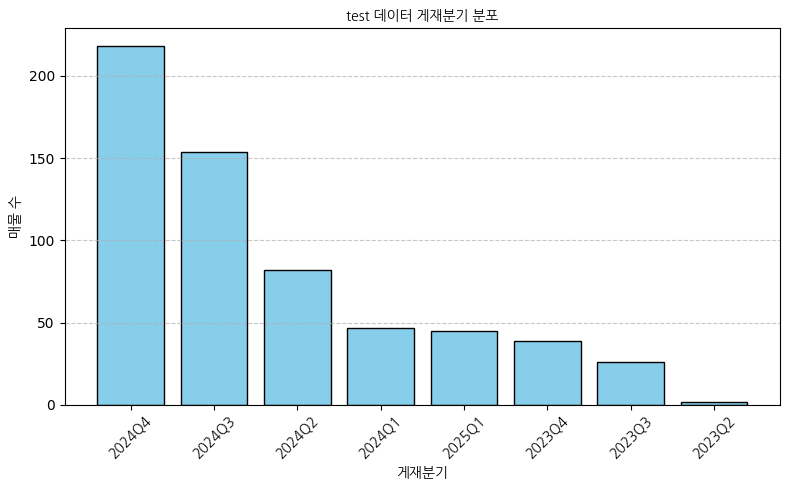

In [19]:
# Í≤åÏû¨Î∂ÑÍ∏∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.bar(test_Q_counts.index, test_Q_counts.values, color='skyblue', edgecolor="k")
plt.title("test Îç∞Ïù¥ÌÑ∞ Í≤åÏû¨Î∂ÑÍ∏∞ Î∂ÑÌè¨", fontsize=12, fontproperties=fontprop)
plt.xlabel("Í≤åÏû¨Î∂ÑÍ∏∞", fontsize=10, fontproperties=fontprop)
plt.ylabel("Îß§Î¨º Ïàò", fontsize=10, fontproperties=fontprop)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)  # YÏ∂ïÏóêÎßå Ï†êÏÑ† Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.xticks(rotation=45, fontproperties=fontprop)
plt.tight_layout()
plt.show()

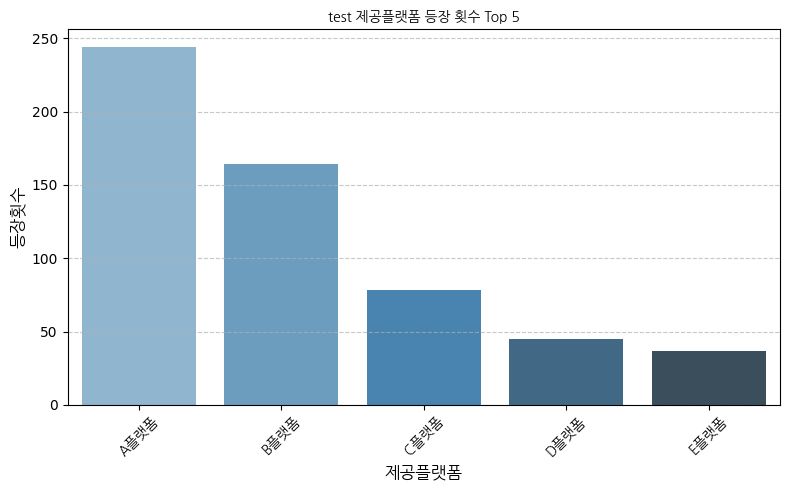

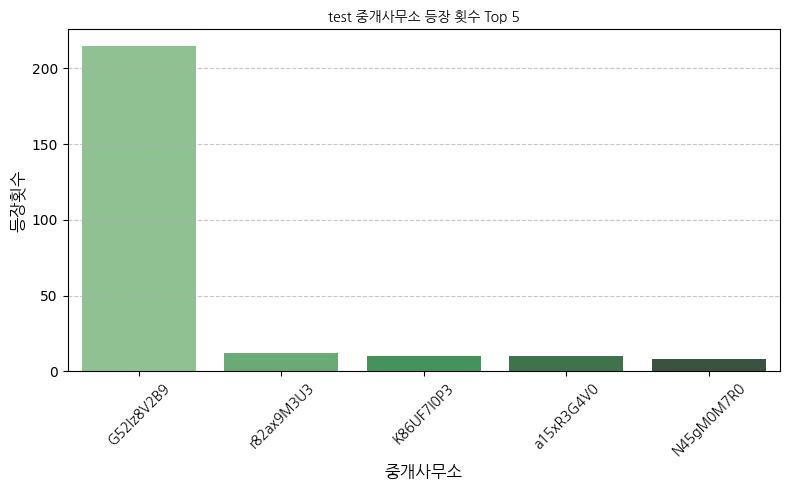

In [20]:
platform_counts = test['Ï†úÍ≥µÌîåÎû´Ìèº'].value_counts()
office_counts = test['Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå'].value_counts()

top5_data = {
    "Ï†úÍ≥µÌîåÎû´Ìèº": platform_counts.nlargest(5),  # Ïó¥ Ïù¥Î¶Ñ Ï†úÍ±∞
    "Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå": office_counts.nlargest(5)    # Ïó¥ Ïù¥Î¶Ñ Ï†úÍ±∞
}

palette = {"Ï†úÍ≥µÌîåÎû´Ìèº": "Blues_d", "Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå": "Greens_d"}

for col, data in top5_data.items():
    plt.figure(figsize=(8, 5))
    sns.barplot(x=data.index, y=data.values, palette=palette[col])
    plt.title(f"test {col} Îì±Ïû• ÌöüÏàò Top 5", fontsize=14, fontproperties=fontprop)
    plt.xlabel(col, fontsize=12, fontproperties=fontprop)
    plt.ylabel("Îì±Ïû•ÌöüÏàò", fontsize=12, fontproperties=fontprop)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, fontproperties=fontprop)
    plt.tight_layout()
    plt.show()

**Test Í∏∞Ï§Ä**
- ÌîåÎû´Ìèº : 'AÌîåÎû´Ìèº'Ïù¥ ÏïΩ 1000Í∞úÎ°ú Îã§ÏàòÏùò Îß§Î¨ºÏùÑ Î≥¥Ïú†Ï§ë
    - AÌîåÎû´Ìèº Ïó≠Ïãú G52Iz8V2B9Ïùò Îß§Î¨ºÏùÑ 78Í∞ú Î≥¥Ïú†Ï§ë (Îã§Ïùå Îã§ÏàòÎäî 10Í∞ú)
- Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå : 'G52Iz8V2B9' Ïù¥ÎùºÎäî Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜåÍ∞Ä ÏïΩ 800Í∞úÏùò Îß§Î¨ºÏùÑ Î≥¥Ïú†Ï§ë
    - G52Iz8V2B9Îäî ÌîåÎû´Ìèº H, K, NÏùÑ Ï†úÏô∏Ìïú Îã§Î•∏ ÌîåÎû´ÌèºÏóê ÏµúÏÜå 2Í∞úÎ∂ÄÌÑ∞ ÏµúÎåÄ 78Í∞úÍπåÏßÄ Îß§Î¨ºÏùÑ Î≥¥Ïú†Ï§ë -> ÎêòÍ≤å ÌÅ∞ Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå Ïù∏ ÎìØ Ìï®
    - G52Iz8V2B9Í∞Ä Îã§Î£®Îäî Îß§Î¨ºÏùò Ï¥ùÏ∏µÏàòÎäî ÏµúÏÜå 2Ï∏µÏóêÏÑú ÏµúÎåÄ 21Ï∏µÍπåÏßÄ Îã§ÏñëÌï®.
        - Í∑∏ Ï§ëÏóêÏÑú Í∞ÄÏû• ÏÉÅÏúÑÍ∂åÏùÄ 6,15,14,4,8,5Ï∏µ

## train

### Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ

In [10]:
train.head(1)

ID Îß§Î¨ºÌôïÏù∏Î∞©Ïãù          Î≥¥Ï¶ùÍ∏à      ÏõîÏÑ∏  Ï†ÑÏö©Î©¥Ï†Å  Ìï¥ÎãπÏ∏µ    Ï¥ùÏ∏µ  Î∞©Ìñ•   Î∞©Ïàò  ÏöïÏã§Ïàò  \
0  TRAIN_0000   ÌòÑÏû•ÌôïÏù∏  402500000.0  470000   NaN  NaN  15.0  ÏÑúÌñ•  1.0  1.0   

  Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä  Ï¥ùÏ£ºÏ∞®ÎåÄÏàò  Í¥ÄÎ¶¨ÎπÑ       Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå Ï†úÍ≥µÌîåÎû´Ìèº         Í≤åÏû¨Ïùº  ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä  
0     Í∞ÄÎä•   40.0   96  t93Nt6I2I0  BÌîåÎû´Ìèº  2024-10-09       0

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   Îß§Î¨ºÌôïÏù∏Î∞©Ïãù  2452 non-null   object 
 2   Î≥¥Ï¶ùÍ∏à     2452 non-null   float64
 3   ÏõîÏÑ∏      2452 non-null   int64  
 4   Ï†ÑÏö©Î©¥Ï†Å    1665 non-null   float64
 5   Ìï¥ÎãπÏ∏µ     2223 non-null   float64
 6   Ï¥ùÏ∏µ      2436 non-null   float64
 7   Î∞©Ìñ•      2452 non-null   object 
 8   Î∞©Ïàò      2436 non-null   float64
 9   ÏöïÏã§Ïàò     2434 non-null   float64
 10  Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä  2452 non-null   object 
 11  Ï¥ùÏ£ºÏ∞®ÎåÄÏàò   1756 non-null   float64
 12  Í¥ÄÎ¶¨ÎπÑ     2452 non-null   int64  
 13  Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå   2452 non-null   object 
 14  Ï†úÍ≥µÌîåÎû´Ìèº   2452 non-null   object 
 15  Í≤åÏû¨Ïùº     2452 non-null   object 
 16  ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [51]:
'''
MeanÍ≥º 50%Í∞ÑÏùò Ï∞®Ïù¥ ÎπÑÍµê (Mean - 50%)
Î≥¥Ï¶ùÍ∏à : +24,918,800 -> Î≥¥Ï¶ùÍ∏àÏóêÏÑú ÌèâÍ∑†Ïóê ÏòÅÌñ•ÏùÑ ÌÅ¨Í≤å ÎÅºÏπòÎäî ÌÅ∞ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ (Ïù¥ÏÉÅÏπòÏùº ÎìØ, 24Î∞±ÎßåÏõê Ï∞®Ïù¥Îäî ÎÑàÎ¨¥ ÌÅ¨Îã§)
ÏõîÏÑ∏ : +420.07 -> ÏõîÏÑ∏ Îã®ÏúÑÎäî (Ïõê) Îã®ÏúÑÎ°ú Ï∂îÏ∏°Îê®. 420Ïõê Ï†ïÎèÑÎäî Ï∞®Ïù¥Í∞Ä ÌÅ¨ÏßÄ ÏïäÏùÄ Ï∞®Ïù¥. But, ÏõîÏÑ∏Í∞Ä 0ÏõêÏù∏ Í≥≥Ïù¥ Ï°¥Ïû¨ -> Ïù¥ÏÉÅÏπòÏù∏Í∞Ä?
Ï†ÑÏö©Î©¥Ï†Å : +0.61 -> Ïõê/Ìà¨Î£∏Ïù¥Îãà Î©¥Ï†ÅÏù¥ (Ìèâ) Îã®ÏúÑÎ°ú Ï∂îÏ∏°Îê®. 0.61Ìèâ Ï∞®Ïù¥Îäî Î¨¥ÎÇúÌïú Ï∞®Ïù¥Ïù¥ÎØÄÎ°ú ÏùòÏã¨ÏùÄ Î≥ÑÎ°ú ÏïàÎê®
Ìï¥ÎãπÏ∏µ : +0.85 -> 21Ï∏µÏù¥ÎùºÎäî Ïù¥ÏÉÅÏπòÍ∞ôÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ Îî∞Î°ú ÎΩëÏïÑÏÑú Î¥êÏïºÌï† ÎìØ
Ï¥ùÏ∏µ : +2.05 -> ÎòëÍ∞ôÏù¥ 21Ï∏µÏù¥ÎùºÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨Ìï®, Ìï¥ÎãπÏ∏µÍ≥ºÏùò Ï∞®Ïù¥Î•º Í¥ÄÏ∞∞Ìï¥Î≥¥Î©¥ ÌÅ∞ Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í±∏Î°ú Î≥¥ÏûÑ -> ÏïÑÎßà 21Ï∏µ Ï†úÏô∏ÌïòÍ≥†Îäî Ï†ïÏÉÅÏùº ÎìØ?
Î∞©Ïàò : +0.38 -> ÎåÄÎ∂ÄÎ∂ÑÏù¥ ÏõêÎ£∏ or Ìà¨Î£∏ÏúºÎ°ú ÏûêÏ∑®Î∞© Ï†ïÎèÑÏùò Î∞©Îì§Î°ú ÏòàÏÉÅÎê® 
ÏöïÏã§Ïàò : +0.03 -> minÎèÑ 1Ïù¥Í≥† ÌôîÏû•Ïã§Ïù¥ 2Í∞úÏù∏ Í≤ÉÎèÑ Ïù¥Ìï¥Í∞Ä Í∞ÄÎØÄÎ°ú Ïù¥ÏÉÅÏπò x
Ï¥ùÏ£ºÏ∞®ÎåÄÏàò : +10.33 -> Ï¥ùÏ£ºÏ∞®ÎåÄÏàòÍ∞Ä 590ÎåÄ? ÏïÑÌååÌä∏ Îã®ÏßÄÏù∏Í∞Ä? ÏïÑÎßàÎèÑ Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Í∞Ä 21Ï∏µ Îç∞Ïù¥ÌÑ∞Ïùº Í≤É Í∞ôÏúºÎãà Ïûò ÌôïÏù∏Ìï¥Î≥¥Ïûê + ÏùºÎ∞ò ÏõêÎ£∏Ïù¥ ÏïÑÎãå Ïò§ÌîºÏä§ÌÖîÎèÑ Ï°¥Ïû¨ÌïòÎäî ÎìØ
Í¥ÄÎ¶¨ÎπÑ : +0.48 -> Í¥ÄÎ¶¨Ïùò Îã®ÏúÑÍ∞Ä (Ïõê)Ïù¥ ÏïÑÎãå (ÎßåÏõê) Îã®ÏúÑÎ°ú Ï∂îÏ∏°Îê®. ÌÑ∞Î¨¥Îãà ÏóÜÏù¥ ÏûëÏùÄ ÏÉÅÌô©
'''
train.iloc[:,12:13].describe()

Í¥ÄÎ¶¨ÎπÑ
count  2419.000000
mean      5.486151
std       5.647353
min       0.000000
25%       0.000000
50%       5.000000
75%       9.000000
max      96.000000

### Îç∞Ïù¥ÌÑ∞ ÌòÑÌô© ÌååÏïÖ - Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ & ÌóàÏúÑ Îß§Î¨º Îç∞Ïù¥ÌÑ∞

In [13]:
print("train Îç∞Ïù¥ÌÑ∞ Ïàò : ", len(train))
print(train.isna().sum())
# ÎÑêÎç∞Ïù¥ÌÑ∞ ÏÉÅÌô© : 
#     Ï†ÑÏö©Î©¥Ï†Å : 787
#     Ìï¥ÎãπÏ∏µ : 229
#     Ï¥ùÏ∏µ : 16
#     Î∞©Ïàò : 16
#     ÏöïÏã§Ïàò : 18
#     Ï¥ùÏ£ºÏ∞®ÎåÄÏàò : 696

train Îç∞Ïù¥ÌÑ∞ Ïàò :  2452
ID          0
Îß§Î¨ºÌôïÏù∏Î∞©Ïãù      0
Î≥¥Ï¶ùÍ∏à         0
ÏõîÏÑ∏          0
Ï†ÑÏö©Î©¥Ï†Å      787
Ìï¥ÎãπÏ∏µ       229
Ï¥ùÏ∏µ         16
Î∞©Ìñ•          0
Î∞©Ïàò         16
ÏöïÏã§Ïàò        18
Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä      0
Ï¥ùÏ£ºÏ∞®ÎåÄÏàò     696
Í¥ÄÎ¶¨ÎπÑ         0
Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå       0
Ï†úÍ≥µÌîåÎû´Ìèº       0
Í≤åÏû¨Ïùº         0
ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä      0
dtype: int64


#### Ï†ÑÏ≤¥ Îß§Î¨º ÌôïÏù∏

In [14]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§Ïùò ÎÇ¥Ïö© ÌôïÏù∏
cate_columns = ['Îß§Î¨ºÌôïÏù∏Î∞©Ïãù', 'Î∞©Ìñ•', 'Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä', 'Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå', 'Ï†úÍ≥µÌîåÎû´Ìèº', 'ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä']

print("\nÎ≤îÏ£ºÌòï Î≥ÄÏàò Í≥†Ïú†Í∞í ÌôïÏù∏:")
for col in cate_columns:
    print(f"[{col}] Í≥†Ïú†Í∞í Î∂ÑÌè¨:")
    print(train[col].value_counts())
    print()


Î≤îÏ£ºÌòï Î≥ÄÏàò Í≥†Ïú†Í∞í ÌôïÏù∏:
[Îß§Î¨ºÌôïÏù∏Î∞©Ïãù] Í≥†Ïú†Í∞í Î∂ÑÌè¨:
Îß§Î¨ºÌôïÏù∏Î∞©Ïãù
ÌòÑÏû•ÌôïÏù∏    1705
Ï†ÑÌôîÌôïÏù∏     382
ÏÑúÎ•òÌôïÏù∏     365
Name: count, dtype: int64

[Î∞©Ìñ•] Í≥†Ïú†Í∞í Î∂ÑÌè¨:
Î∞©Ìñ•
ÎÇ®Ìñ•     610
ÎèôÌñ•     605
ÏÑúÌñ•     389
ÎÇ®ÎèôÌñ•    275
ÎÇ®ÏÑúÌñ•    220
Î∂ÅÌñ•     198
Î∂ÅÏÑúÌñ•     80
Î∂ÅÎèôÌñ•     75
Name: count, dtype: int64

[Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä] Í≥†Ïú†Í∞í Î∂ÑÌè¨:
Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä
Í∞ÄÎä•     1237
Î∂àÍ∞ÄÎä•    1215
Name: count, dtype: int64

[Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå] Í≥†Ïú†Í∞í Î∂ÑÌè¨:
Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå
G52Iz8V2B9    799
r82ax9M3U3     43
J52gJ2E4T6     32
H90uE4C0W5     30
b87Td0W4Y3     27
             ... 
m75Dz8P6I7      1
A21Yr4B1U8      1
g11ci7P5V1      1
D26uW0Q2N3      1
L27JO3N6S2      1
Name: count, Length: 279, dtype: int64

[Ï†úÍ≥µÌîåÎû´Ìèº] Í≥†Ïú†Í∞í Î∂ÑÌè¨:
Ï†úÍ≥µÌîåÎû´Ìèº
AÌîåÎû´Ìèº    958
BÌîåÎû´Ìèº    610
CÌîåÎû´Ìèº    350
DÌîåÎû´Ìèº    184
EÌîåÎû´Ìèº    142
FÌîåÎû´Ìèº     63
GÌîåÎû´Ìèº     59
HÌîåÎû´Ìèº     34
IÌîåÎû´Ìèº     20
JÌîå

In [15]:
train.head()

ID Îß§Î¨ºÌôïÏù∏Î∞©Ïãù          Î≥¥Ï¶ùÍ∏à      ÏõîÏÑ∏  Ï†ÑÏö©Î©¥Ï†Å  Ìï¥ÎãπÏ∏µ    Ï¥ùÏ∏µ   Î∞©Ìñ•   Î∞©Ïàò  ÏöïÏã§Ïàò  \
0  TRAIN_0000   ÌòÑÏû•ÌôïÏù∏  402500000.0  470000   NaN  NaN  15.0   ÏÑúÌñ•  1.0  1.0   
1  TRAIN_0001   ÌòÑÏû•ÌôïÏù∏  170500000.0  200000   NaN  3.0   4.0  ÎÇ®ÎèôÌñ•  2.0  1.0   
2  TRAIN_0002   Ï†ÑÌôîÌôïÏù∏  114000000.0  380000   NaN  2.0   3.0   ÎèôÌñ•  1.0  1.0   
3  TRAIN_0003   ÌòÑÏû•ÌôïÏù∏  163500000.0   30000  36.3  3.0   9.0  ÎÇ®ÎèôÌñ•  2.0  1.0   
4  TRAIN_0004   ÌòÑÏû•ÌôïÏù∏  346000000.0  530000   NaN  3.0   3.0   ÎèôÌñ•  2.0  1.0   

  Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä  Ï¥ùÏ£ºÏ∞®ÎåÄÏàò  Í¥ÄÎ¶¨ÎπÑ       Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå Ï†úÍ≥µÌîåÎû´Ìèº         Í≤åÏû¨Ïùº  ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä  
0     Í∞ÄÎä•   40.0   96  t93Nt6I2I0  BÌîåÎû´Ìèº  2024-10-09       0  
1    Î∂àÍ∞ÄÎä•    NaN    0  q39iV5J4E6  DÌîåÎû´Ìèº  2024-12-26       0  
2    Î∂àÍ∞ÄÎä•    NaN    0  b03oE4G3F6  AÌîåÎû´Ìèº  2024-11-28       0  
3     Í∞ÄÎä•   13.0   10  G52Iz8V2B9  AÌîåÎû´Ìèº  2024-11-26       0  
4    Î∂àÍ∞ÄÎä•    NaN    0  N45gM0M7R0  BÌîåÎû´Ìèº  2024-06-25       1

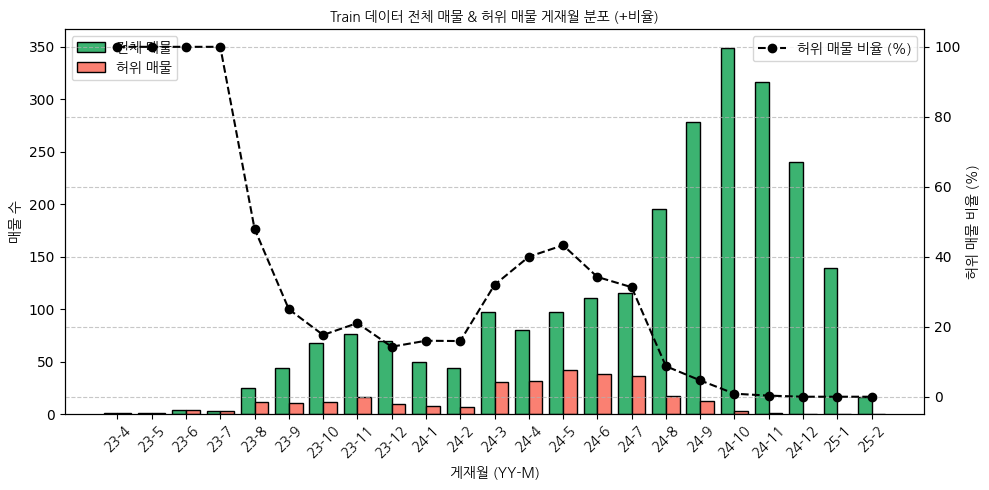

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# üìå ÌòÑÏû¨ ÎÇ†Ïßú Í∏∞Ï§Ä ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
today = pd.Timestamp.today()

# "Í≤åÏû¨Ïùº" Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
train["Í≤åÏû¨Ïùº"] = pd.to_datetime(train["Í≤åÏû¨Ïùº"], errors="coerce")

# ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ (Ïò§Îäò ÎÇ†Ïßú Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú)
train = train[train["Í≤åÏû¨Ïùº"] <= today]

# "Í≤åÏû¨Ïõî" Ïª¨Îüº ÏÉùÏÑ± (YY-M ÌòïÏãù, Ïòà: "24-1")
train["Í≤åÏû¨Ïõî"] = train["Í≤åÏû¨Ïùº"].dt.strftime("%y-%-m")

# üìä Ï†ÑÏ≤¥ Îß§Î¨º & ÌóàÏúÑ Îß§Î¨º Í∞úÏàò ÏßëÍ≥Ñ
total_M_counts = train["Í≤åÏû¨Ïõî"].value_counts()
fake_M_counts = train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 1]["Í≤åÏû¨Ïõî"].value_counts()

# üìå NaN Í∞í Ï≤òÎ¶¨ Î∞è Ï†ïÎ†¨
sorted_index = sorted(total_M_counts.index, key=lambda x: [int(i) for i in x.split('-')])
total_M_counts_sorted = total_M_counts.reindex(sorted_index).fillna(0)
fake_M_counts_sorted = fake_M_counts.reindex(sorted_index).fillna(0)

# üìå ÌóàÏúÑ Îß§Î¨º ÎπÑÏú®(%) Í≥ÑÏÇ∞
fake_rates_sorted = (fake_M_counts_sorted / total_M_counts_sorted * 100).fillna(0)

# üìä ÏãúÍ∞ÅÌôî (Ï†ÑÏ≤¥ Îß§Î¨º vs ÌóàÏúÑ Îß§Î¨º + ÎπÑÏú® Ï∂îÍ∞Ä)
fig, ax1 = plt.subplots(figsize=(10, 5))

bar_width = 0.4  # ÎßâÎåÄ ÎÑàÎπÑ ÏÑ§Ï†ï
x_labels = total_M_counts_sorted.index  # xÏ∂ï Î†àÏù¥Î∏î
x_pos = np.arange(len(x_labels))  # xÏ∂ï ÏúÑÏπò ÏÑ§Ï†ï

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ (Ï†ÑÏ≤¥ Îß§Î¨º vs ÌóàÏúÑ Îß§Î¨º)
ax1.bar(x_pos, total_M_counts_sorted.values, width=bar_width, label="Ï†ÑÏ≤¥ Îß§Î¨º", color="mediumseagreen", edgecolor="k")
ax1.bar([p + bar_width for p in x_pos], fake_M_counts_sorted.values, width=bar_width, label="ÌóàÏúÑ Îß§Î¨º", color="salmon", edgecolor="k")

# üìå 2Ï∂ï Ï∂îÍ∞Ä (ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® %)
ax2 = ax1.twinx()
ax2.plot(x_pos + bar_width / 2, fake_rates_sorted.values, color="black", marker="o", linestyle="dashed", label="ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)")

# üìå Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï (Ìè∞Ìä∏ Ïò§Î•ò Î∞©ÏßÄ)
try:
    ax1.set_xticks(x_pos + bar_width / 2)
    ax1.set_xticklabels(x_labels, rotation=45, fontproperties=fontprop)
    ax1.set_xlabel("Í≤åÏû¨Ïõî (YY-M)", fontsize=10, fontproperties=fontprop)
    ax1.set_ylabel("Îß§Î¨º Ïàò", fontsize=10, fontproperties=fontprop)
    ax2.set_ylabel("ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)", fontsize=10, color="black", fontproperties=fontprop)
    plt.title("Train Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥ Îß§Î¨º & ÌóàÏúÑ Îß§Î¨º Í≤åÏû¨Ïõî Î∂ÑÌè¨ (+ÎπÑÏú®)", fontsize=12, fontproperties=fontprop)
    ax1.legend(prop=fontprop, loc="upper left")
    ax2.legend(prop=fontprop, loc="upper right")
except NameError:
    ax1.set_xticks(x_pos + bar_width / 2)
    ax1.set_xticklabels(x_labels, rotation=45)
    ax1.set_xlabel("Í≤åÏû¨Ïõî (YY-M)", fontsize=10)
    ax1.set_ylabel("Îß§Î¨º Ïàò", fontsize=10)
    ax2.set_ylabel("ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)", fontsize=10, color="black")
    plt.title("Train Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥ Îß§Î¨º & ÌóàÏúÑ Îß§Î¨º Í≤åÏû¨Ïõî Î∂ÑÌè¨ (+ ÌóàÏúÑ Îß§Î¨º ÎπÑÏú®)", fontsize=12)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
train[train['Í≤åÏû¨Ïõî'] == '25-3']

Empty DataFrame
Columns: [ID, Îß§Î¨ºÌôïÏù∏Î∞©Ïãù, Î≥¥Ï¶ùÍ∏à, ÏõîÏÑ∏, Ï†ÑÏö©Î©¥Ï†Å, Ìï¥ÎãπÏ∏µ, Ï¥ùÏ∏µ, Î∞©Ìñ•, Î∞©Ïàò, ÏöïÏã§Ïàò, Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä, Ï¥ùÏ£ºÏ∞®ÎåÄÏàò, Í¥ÄÎ¶¨ÎπÑ, Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå, Ï†úÍ≥µÌîåÎû´Ìèº, Í≤åÏû¨Ïùº, ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä, Í≤åÏû¨Ïõî]
Index: []

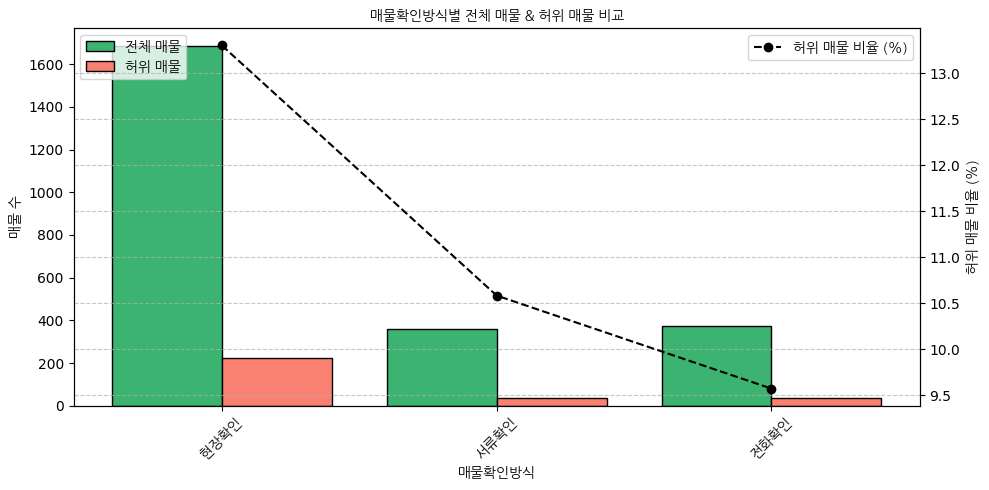

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# üìä Îß§Î¨ºÌôïÏù∏Î∞©ÏãùÎ≥Ñ Ï†ÑÏ≤¥ Îß§Î¨º Í∞úÏàò ÏßëÍ≥Ñ
total_check_counts = train["Îß§Î¨ºÌôïÏù∏Î∞©Ïãù"].value_counts()

# üìä Îß§Î¨ºÌôïÏù∏Î∞©ÏãùÎ≥Ñ ÌóàÏúÑ Îß§Î¨º Í∞úÏàò ÏßëÍ≥Ñ
fake_check_counts = train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 1]["Îß§Î¨ºÌôïÏù∏Î∞©Ïãù"].value_counts()

# üìå ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%) Í≥ÑÏÇ∞
check_methods = total_check_counts.index  # Î™®Îì† ÌôïÏù∏Î∞©Ïãù
fake_rates = (fake_check_counts / total_check_counts * 100).fillna(0)  # NaN -> 0 Ï≤òÎ¶¨

# üìå Ï†ïÎ†¨ (ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® Ïàú Ï†ïÎ†¨)
sorted_index = fake_rates.sort_values(ascending=False).index
total_check_counts_sorted = total_check_counts.reindex(sorted_index)
fake_check_counts_sorted = fake_check_counts.reindex(sorted_index).fillna(0)
fake_rates_sorted = fake_rates.reindex(sorted_index)

# üìä ÏãúÍ∞ÅÌôî (Îß§Î¨ºÌôïÏù∏Î∞©ÏãùÎ≥Ñ Ï†ÑÏ≤¥ Îß§Î¨º vs ÌóàÏúÑ Îß§Î¨º)
fig, ax1 = plt.subplots(figsize=(10, 5))

bar_width = 0.4  # ÎßâÎåÄ ÎÑàÎπÑ ÏÑ§Ï†ï
x_pos = np.arange(len(sorted_index))  # xÏ∂ï ÏúÑÏπò ÏÑ§Ï†ï

ax1.bar(x_pos, total_check_counts_sorted.values, width=bar_width, label="Ï†ÑÏ≤¥ Îß§Î¨º", color="mediumseagreen", edgecolor="k")
ax1.bar(x_pos + bar_width, fake_check_counts_sorted.values, width=bar_width, label="ÌóàÏúÑ Îß§Î¨º", color="salmon", edgecolor="k")

# üìå 2Ï∂ï Ï∂îÍ∞Ä (ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® %)
ax2 = ax1.twinx()
ax2.plot(x_pos + bar_width / 2, fake_rates_sorted.values, color="black", marker="o", linestyle="dashed", label="ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)")

# üìå Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï (Ìè∞Ìä∏ Ïò§Î•ò Î∞©ÏßÄ)
try:
    ax1.set_xticks(x_pos + bar_width / 2)
    ax1.set_xticklabels(sorted_index, rotation=45, fontproperties=fontprop)
    ax1.set_xlabel("Îß§Î¨ºÌôïÏù∏Î∞©Ïãù", fontsize=10, fontproperties=fontprop)
    ax1.set_ylabel("Îß§Î¨º Ïàò", fontsize=10, fontproperties=fontprop)
    ax2.set_ylabel("ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)", fontsize=10, color="black", fontproperties=fontprop)
    plt.title("Îß§Î¨ºÌôïÏù∏Î∞©ÏãùÎ≥Ñ Ï†ÑÏ≤¥ Îß§Î¨º & ÌóàÏúÑ Îß§Î¨º ÎπÑÍµê", fontsize=12, fontproperties=fontprop)
    ax1.legend(prop=fontprop, loc="upper left")
    ax2.legend(prop=fontprop, loc="upper right")
except NameError:
    ax1.set_xticks(x_pos + bar_width / 2)
    ax1.set_xticklabels(sorted_index, rotation=45)
    ax1.set_xlabel("Îß§Î¨ºÌôïÏù∏Î∞©Ïãù", fontsize=10)
    ax1.set_ylabel("Îß§Î¨º Ïàò", fontsize=10)
    ax2.set_ylabel("ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)", fontsize=10, color="black")
    plt.title("Îß§Î¨ºÌôïÏù∏Î∞©ÏãùÎ≥Ñ Ï†ÑÏ≤¥ Îß§Î¨º & ÌóàÏúÑ Îß§Î¨º ÎπÑÍµê", fontsize=12)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Î≤îÏ£ºÌòï Î≥ÄÏàò ÏãúÍ∞ÅÌôî:


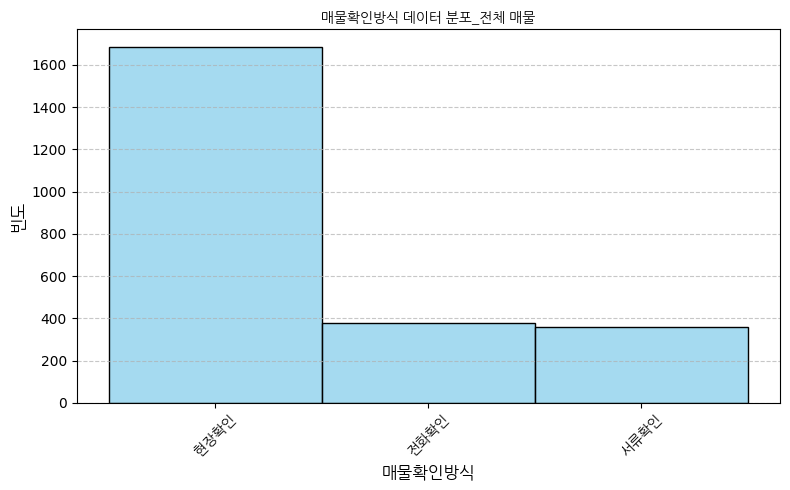

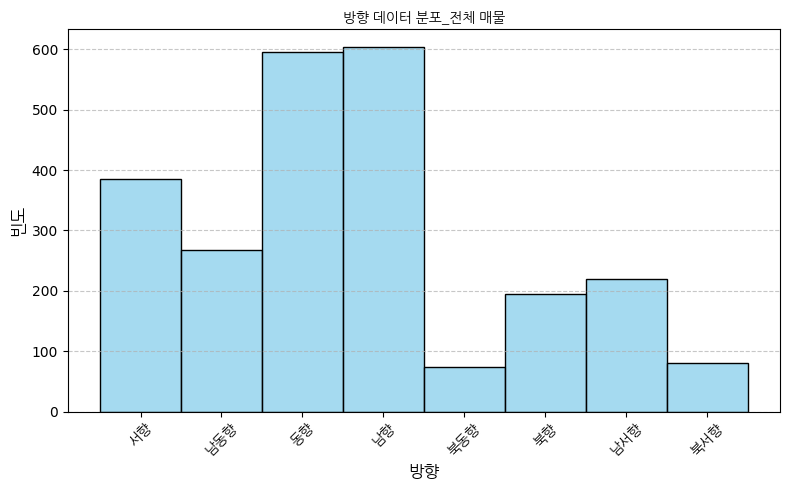

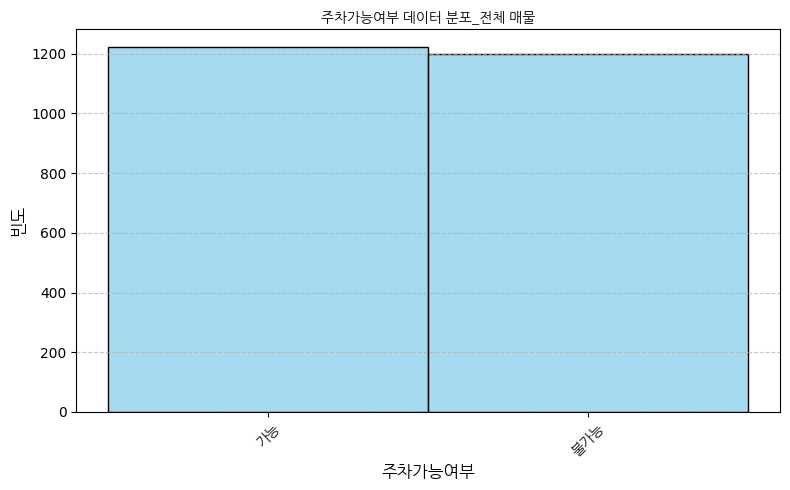

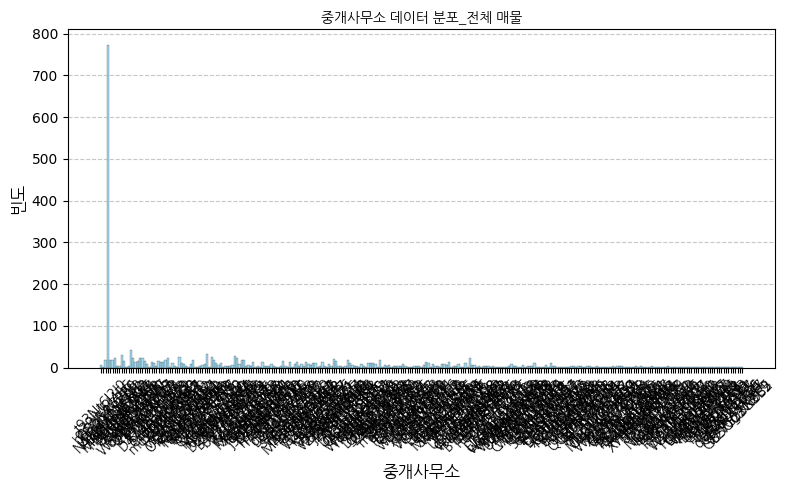

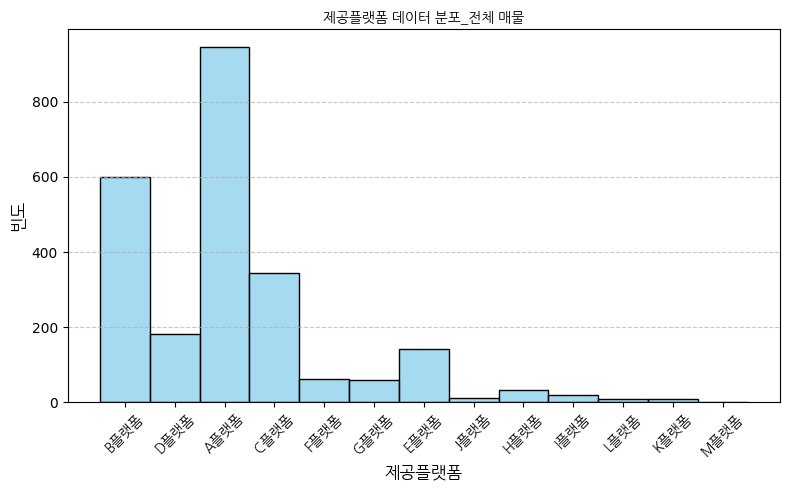

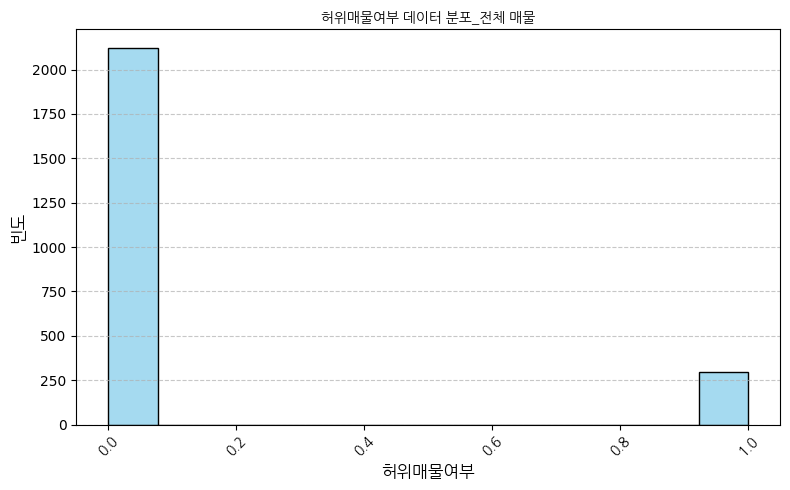

In [19]:
print("\nÎ≤îÏ£ºÌòï Î≥ÄÏàò ÏãúÍ∞ÅÌôî:")
for col in cate_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=train, x=col, kde=False, color="skyblue", edgecolor="black")
    plt.title(f"{col} Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨_Ï†ÑÏ≤¥ Îß§Î¨º", fontsize=14, fontproperties=fontprop)
    plt.xlabel(col, fontsize=12, fontproperties=fontprop)
    plt.ylabel("ÎπàÎèÑ", fontsize=12, fontproperties=fontprop)
    plt.xticks(rotation=45, fontsize=10, fontproperties=fontprop) # XÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ (Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº ÌïÑÏöî)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # YÏ∂ï Ï†êÏÑ† Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
    plt.tight_layout()
    plt.show()

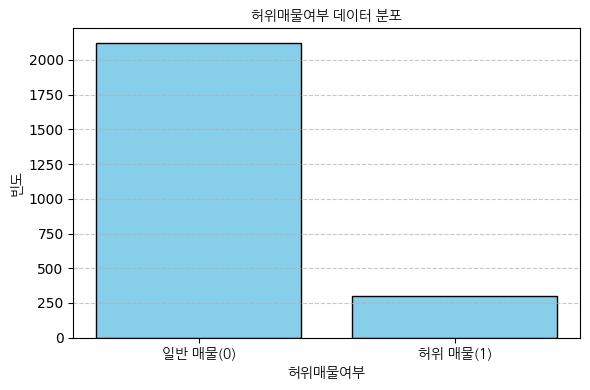

In [20]:
import matplotlib.pyplot as plt

# üìä ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ (0Í≥º 1 Í∞úÏàò ÏßëÍ≥Ñ)
fake_counts = train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"].value_counts()

# üìä ÏãúÍ∞ÅÌôî (0Í≥º 1Îßå ÌëúÏãú)
plt.figure(figsize=(6, 4))
plt.bar(fake_counts.index, fake_counts.values, color="skyblue", edgecolor="k")

# üìå XÏ∂ïÏùÑ 0Í≥º 1Îßå ÌëúÏãú
plt.xticks([0, 1], labels=["ÏùºÎ∞ò Îß§Î¨º(0)", "ÌóàÏúÑ Îß§Î¨º(1)"], fontproperties=fontprop)
plt.xlabel("ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä", fontsize=10, fontproperties=fontprop)
plt.ylabel("ÎπàÎèÑ", fontsize=10, fontproperties=fontprop)
plt.title("ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨", fontsize=12, fontproperties=fontprop)

plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

###### Î≤îÏ£ºÌòï Î≥ÄÏàò ÏûêÏÑ∏Ìûà ÏãúÍ∞ÅÌôî

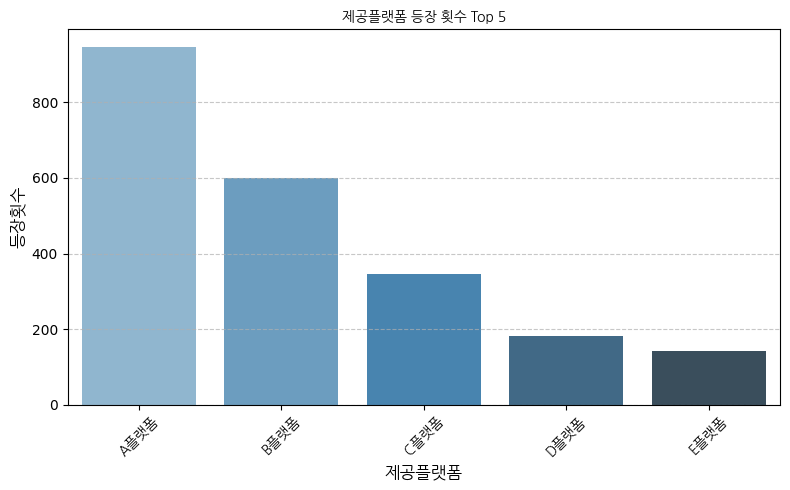

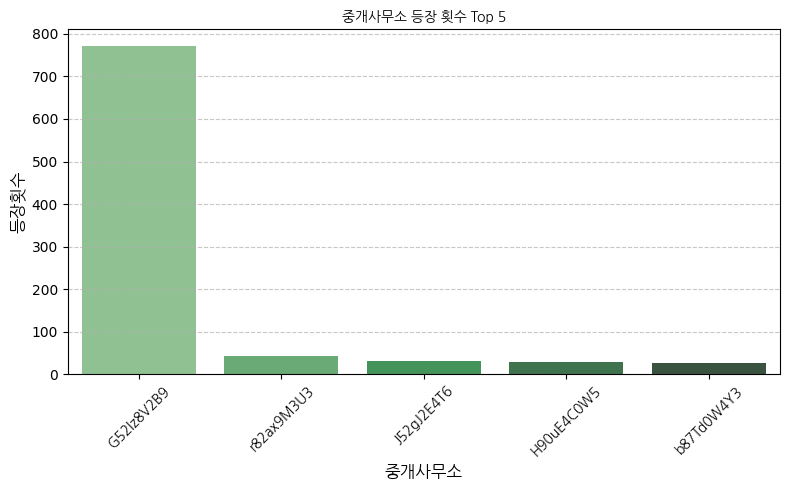

In [21]:
platform_counts = train['Ï†úÍ≥µÌîåÎû´Ìèº'].value_counts()
office_counts = train['Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå'].value_counts()

top5_data = {
    "Ï†úÍ≥µÌîåÎû´Ìèº": platform_counts.nlargest(5),  # Ïó¥ Ïù¥Î¶Ñ Ï†úÍ±∞
    "Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå": office_counts.nlargest(5)    # Ïó¥ Ïù¥Î¶Ñ Ï†úÍ±∞
}

palette = {"Ï†úÍ≥µÌîåÎû´Ìèº": "Blues_d", "Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå": "Greens_d"}

for col, data in top5_data.items():
    plt.figure(figsize=(8, 5))
    sns.barplot(x=data.index, y=data.values, palette=palette[col])
    plt.title(f"{col} Îì±Ïû• ÌöüÏàò Top 5", fontsize=14, fontproperties=fontprop)
    plt.xlabel(col, fontsize=12, fontproperties=fontprop)
    plt.ylabel("Îì±Ïû•ÌöüÏàò", fontsize=12, fontproperties=fontprop)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, fontproperties=fontprop)
    plt.tight_layout()
    plt.show()

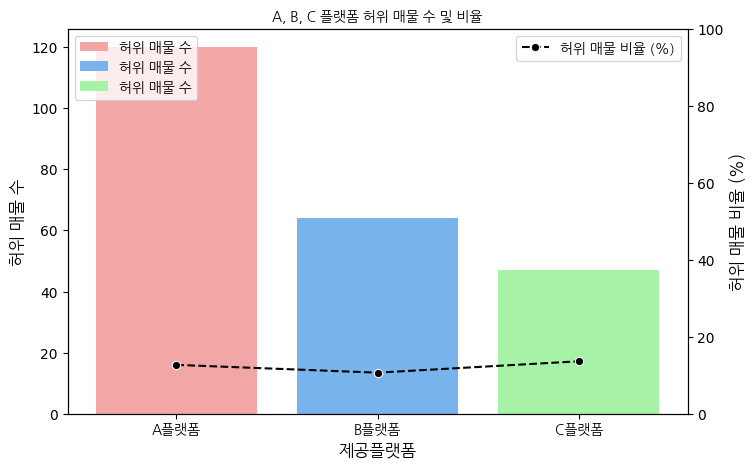

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# üìå ÏÉÅÏúÑ 3Í∞ú ÌîåÎû´Ìèº ÏÑ†ÌÉù (A, B, C ÌîåÎû´ÌèºÎßå ÌïÑÌÑ∞ÎßÅ)
top_platforms = ["AÌîåÎû´Ìèº", "BÌîåÎû´Ìèº", "CÌîåÎû´Ìèº"]
train_top_platforms = train[train["Ï†úÍ≥µÌîåÎû´Ìèº"].isin(top_platforms)]

# üìå Ï†ÑÏ≤¥ Îß§Î¨º Í∞úÏàò & ÌóàÏúÑ Îß§Î¨º Í∞úÏàò Í≥ÑÏÇ∞
platform_counts = train_top_platforms["Ï†úÍ≥µÌîåÎû´Ìèº"].value_counts()
fake_counts = train_top_platforms[train_top_platforms["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 1]["Ï†úÍ≥µÌîåÎû´Ìèº"].value_counts()

# üìå ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® Í≥ÑÏÇ∞
fake_ratio = (fake_counts / platform_counts * 100).fillna(0)  # NaN Î∞©ÏßÄ

# üìä ÏãúÍ∞ÅÌôî: ÌóàÏúÑ Îß§Î¨º Í∞úÏàò Î∞è ÎπÑÏú®
fig, ax1 = plt.subplots(figsize=(8, 5))

# üé® ÌîåÎû´ÌèºÎ≥Ñ Í∞úÎ≥Ñ ÏÉâÏÉÅ ÏßÄÏ†ï
platform_colors = ["#FF9999", "#66B3FF", "#99FF99"]  # A: Ïó∞ÌïúÎπ®Í∞ï, B: Ïó∞ÌïúÌååÎûë, C: Ïó∞ÌïúÏ¥àÎ°ù

# üîπ ÌóàÏúÑ Îß§Î¨º Í∞úÏàò (ÎßâÎåÄ Í∑∏ÎûòÌîÑ)
sns.barplot(x=fake_counts.index, y=fake_counts.values, palette=platform_colors, label="ÌóàÏúÑ Îß§Î¨º Ïàò", ax=ax1)
ax1.set_ylabel("ÌóàÏúÑ Îß§Î¨º Ïàò", fontsize=12, fontproperties=fontprop)
ax1.set_xlabel("Ï†úÍ≥µÌîåÎû´Ìèº", fontsize=12, fontproperties=fontprop)
ax1.set_title("A, B, C ÌîåÎû´Ìèº ÌóàÏúÑ Îß§Î¨º Ïàò Î∞è ÎπÑÏú®", fontsize=14, fontproperties=fontprop)
ax1.tick_params(axis="y")

# üìå üî• xÏ∂ï ÎùºÎ≤®(Ï†úÍ≥µÌîåÎû´Ìèº) Ìè∞Ìä∏ Ï†ÅÏö©
ax1.set_xticklabels(fake_counts.index, fontproperties=fontprop, fontsize=10)

# üîπ ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (ÏÑ† Í∑∏ÎûòÌîÑ)
ax2 = ax1.twinx()
sns.lineplot(x=fake_ratio.index, y=fake_ratio.values, color="black", marker="o", linestyle="dashed", label="ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)", ax=ax2)
ax2.set_ylabel("ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)", fontsize=12, fontproperties=fontprop)
ax2.set_ylim(0, 100)  # ÎπÑÏú® Î≤îÏúÑ ÏÑ§Ï†ï

# üìå Î≤îÎ°Ä ÏÑ§Ï†ï
ax1.legend(loc="upper left", fontsize=10, prop=fontprop)
ax2.legend(loc="upper right", fontsize=10, prop=fontprop)

plt.show()

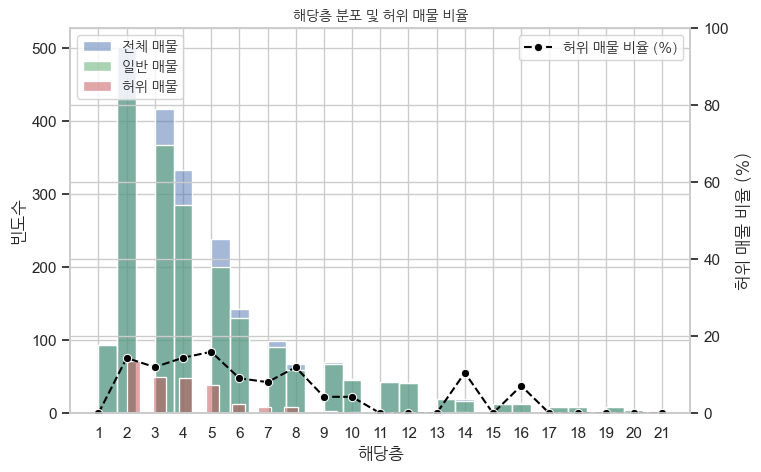

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Seaborn Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_theme(style="whitegrid")

# üìå ÏÉâÏÉÅ ÏÑ§Ï†ï (Í∞Å Í∑∏Î£πÎ≥Ñ Í∞úÎ≥Ñ ÏÉâÏÉÅ)
colors = {"Ï†ÑÏ≤¥ Îß§Î¨º": "#4C72B0", "ÏùºÎ∞ò Îß§Î¨º": "#55A868", "ÌóàÏúÑ Îß§Î¨º": "#C44E52"}

# üìå Ï†ÑÏ≤¥ Îß§Î¨º, ÏùºÎ∞ò Îß§Î¨º(ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä=0), ÌóàÏúÑ Îß§Î¨º(ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä=1) Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
train_total = train["Ìï¥ÎãπÏ∏µ"]
train_real = train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 0]["Ìï¥ÎãπÏ∏µ"]
train_fake = train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 1]["Ìï¥ÎãπÏ∏µ"]

# üìä ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® Í≥ÑÏÇ∞
floor_counts = train["Ìï¥ÎãπÏ∏µ"].value_counts().sort_index()  # Í∞Å Ï∏µÎ≥Ñ Ï†ÑÏ≤¥ Îß§Î¨º Í∞úÏàò
fake_counts = train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 1]["Ìï¥ÎãπÏ∏µ"].value_counts().sort_index()  # Í∞Å Ï∏µÎ≥Ñ ÌóàÏúÑ Îß§Î¨º Í∞úÏàò
fake_ratio = (fake_counts / floor_counts * 100).fillna(0)  # ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® Í≥ÑÏÇ∞ (%)

# üìä Ìï¥ÎãπÏ∏µ Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû® & ÌóàÏúÑ Îß§Î¨º ÎπÑÏú®
fig, ax1 = plt.subplots(figsize=(8, 5))

# üîπ Ìï¥ÎãπÏ∏µ ÌûàÏä§ÌÜ†Í∑∏Îû® (Ï†ÑÏ≤¥ Îß§Î¨º, ÏùºÎ∞ò Îß§Î¨º, ÌóàÏúÑ Îß§Î¨º)
sns.histplot(train_total, bins=30, color=colors["Ï†ÑÏ≤¥ Îß§Î¨º"], label="Ï†ÑÏ≤¥ Îß§Î¨º", alpha=0.5, ax=ax1)
sns.histplot(train_real, bins=30, color=colors["ÏùºÎ∞ò Îß§Î¨º"], label="ÏùºÎ∞ò Îß§Î¨º", alpha=0.5, ax=ax1)
sns.histplot(train_fake, bins=30, color=colors["ÌóàÏúÑ Îß§Î¨º"], label="ÌóàÏúÑ Îß§Î¨º", alpha=0.5, ax=ax1)

# üìå XÏ∂ï 1 Îã®ÏúÑÎ°ú ÏÑ§Ï†ï
min_floor = int(train["Ìï¥ÎãπÏ∏µ"].min())  # ÏµúÏÜåÍ∞í (Ï†ïÏàò Î≥ÄÌôò)
max_floor = int(train["Ìï¥ÎãπÏ∏µ"].max())  # ÏµúÎåÄÍ∞í (Ï†ïÏàò Î≥ÄÌôò)
ax1.set_xticks(range(min_floor, max_floor + 1, 1))  # 1Ïî© Ï¶ùÍ∞Ä
ax1.set_xlabel("Ìï¥ÎãπÏ∏µ", fontsize=12, fontproperties=fontprop)
ax1.set_ylabel("ÎπàÎèÑÏàò", fontsize=12, fontproperties=fontprop)

# üîπ ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® ÏÑ† Í∑∏ÎûòÌîÑ Ï∂îÍ∞Ä (Ïù¥Ï§ë Ï∂ï)
ax2 = ax1.twinx()
sns.lineplot(x=fake_ratio.index, y=fake_ratio.values, color="black", marker="o", linestyle="dashed", label="ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)", ax=ax2)
ax2.set_ylabel("ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)", fontsize=12, fontproperties=fontprop)
ax2.set_ylim(0, 100)  # ÎπÑÏú® Î≤îÏúÑ 0~100%

# üìå Ï†úÎ™© Î∞è Î≤îÎ°Ä ÏÑ§Ï†ï
plt.title("Ìï¥ÎãπÏ∏µ Î∂ÑÌè¨ Î∞è ÌóàÏúÑ Îß§Î¨º ÎπÑÏú®", fontsize=14, fontproperties=fontprop)
ax1.legend(prop=fontprop, fontsize=10, loc="upper left")
ax2.legend(prop=fontprop, fontsize=10, loc="upper right")

plt.show()

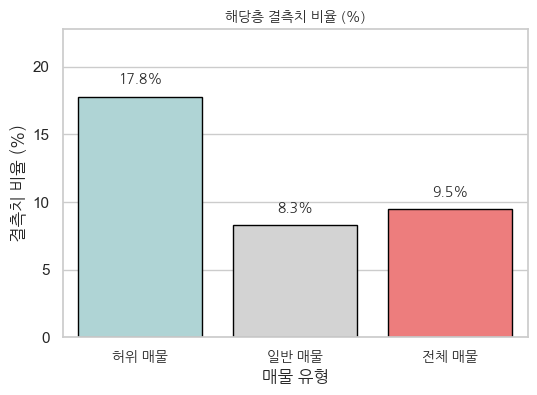

In [36]:
# üìå Seaborn Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_theme(style="whitegrid")

# üìå ÌóàÏúÑ Îß§Î¨º, ÏùºÎ∞ò Îß§Î¨º, Ï†ÑÏ≤¥ Îß§Î¨º Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
false_listing = train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 1]  # ÌóàÏúÑ Îß§Î¨º
real_listing = train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 0]  # ÏùºÎ∞ò Îß§Î¨º

# üìå Ìï¥ÎãπÏ∏µ Í≤∞Ï∏°Ïπò ÎπÑÏú® Í≥ÑÏÇ∞
false_missing_ratio = (false_listing["Ìï¥ÎãπÏ∏µ"].isnull().sum() / len(false_listing)) * 100
real_missing_ratio = (real_listing["Ìï¥ÎãπÏ∏µ"].isnull().sum() / len(real_listing)) * 100
total_missing_ratio = (train["Ìï¥ÎãπÏ∏µ"].isnull().sum() / len(train)) * 100

# üìå Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
missing_data = pd.DataFrame({
    "Îß§Î¨º Ïú†Ìòï": ["ÌóàÏúÑ Îß§Î¨º", "ÏùºÎ∞ò Îß§Î¨º", "Ï†ÑÏ≤¥ Îß§Î¨º"],
    "Í≤∞Ï∏°Ïπò ÎπÑÏú® (%)": [false_missing_ratio, real_missing_ratio, total_missing_ratio]
})

# üìä ÏÉâÏÉÅ ÏÑ§Ï†ï
colors = ["#A8DADC", "#D3D3D3", "#FF6B6B"]  # ÌóàÏúÑ Îß§Î¨º(ÌååÎûë), ÏùºÎ∞ò Îß§Î¨º(ÌöåÏÉâ), Ï†ÑÏ≤¥(Îπ®Í∞ï)

# üìä ÏãúÍ∞ÅÌôî: ÌóàÏúÑ Îß§Î¨º, ÏùºÎ∞ò Îß§Î¨º, Ï†ÑÏ≤¥ Îß§Î¨ºÏùò Ìï¥ÎãπÏ∏µ Í≤∞Ï∏° ÎπÑÏú®
plt.figure(figsize=(6, 4))
sns.barplot(x="Îß§Î¨º Ïú†Ìòï", y="Í≤∞Ï∏°Ïπò ÎπÑÏú® (%)", data=missing_data, palette=colors, edgecolor="black")

# üìå Ï†úÎ™© Î∞è ÎùºÎ≤® ÏÑ§Ï†ï
plt.title("Ìï¥ÎãπÏ∏µ Í≤∞Ï∏°Ïπò ÎπÑÏú® (%)", fontsize=14, fontproperties=fontprop)
plt.xlabel("Îß§Î¨º Ïú†Ìòï", fontsize=12, fontproperties=fontprop)
plt.ylabel("Í≤∞Ï∏°Ïπò ÎπÑÏú® (%)", fontsize=12, fontproperties=fontprop)

# üìå XÏ∂ï Ìè∞Ìä∏ Ï†ÅÏö©
plt.xticks(fontproperties=fontprop, fontsize=10)  # üî• XÏ∂ï Ìè∞Ìä∏ Ï†ÅÏö©

# üìå YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï (0~ÏµúÎåÄÍ∞í + Ïó¨Ïú†Í≥µÍ∞Ñ)
plt.ylim(0, max(missing_data["Í≤∞Ï∏°Ïπò ÎπÑÏú® (%)"]) + 5)

# üìå ÎßâÎåÄ ÏúÑÏóê ÎπÑÏú® Í∞í ÌëúÏãú
for i, value in enumerate(missing_data["Í≤∞Ï∏°Ïπò ÎπÑÏú® (%)"]):
    plt.text(i, value + 1, f"{value:.1f}%", ha="center", fontsize=10, fontproperties=fontprop)

plt.show()

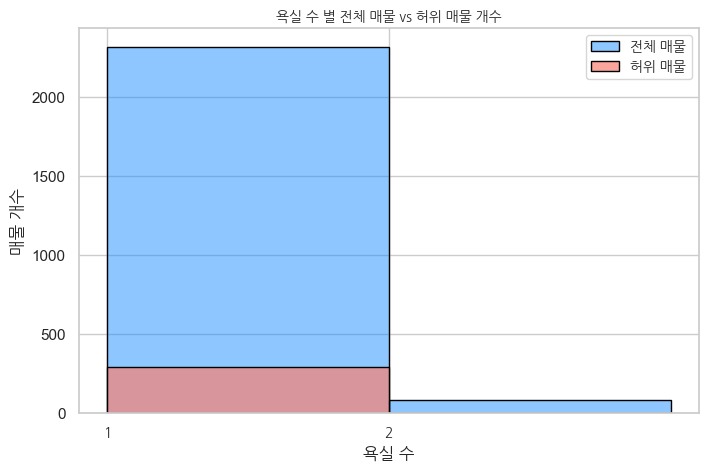

In [ ]:
# üìå Seaborn Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_theme(style="whitegrid")

# üìå Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
bathroom_total = train["ÏöïÏã§Ïàò"]  # Ï†ÑÏ≤¥ Îß§Î¨º
bathroom_fake = train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 1]["ÏöïÏã§Ïàò"]  # ÌóàÏúÑ Îß§Î¨ºÎßå ÏÑ†ÌÉù

# üìä ÏöïÏã§ Ïàò Î≥Ñ Ï†ÑÏ≤¥ Îß§Î¨º & ÌóàÏúÑ Îß§Î¨º ÎπÑÍµê ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(8, 5))
sns.histplot(bathroom_total, bins=range(int(bathroom_total.min()), int(bathroom_total.max()) + 2),
             color="dodgerblue", edgecolor="black", alpha=0.5, label="Ï†ÑÏ≤¥ Îß§Î¨º")
sns.histplot(bathroom_fake, bins=range(int(bathroom_fake.min()), int(bathroom_fake.max()) + 2),
             color="salmon", edgecolor="black", alpha=0.7, label="ÌóàÏúÑ Îß§Î¨º")

# üìå XÏ∂ï 1 Îã®ÏúÑÎ°ú ÏÑ§Ï†ï
plt.xticks(range(int(bathroom_total.min()), int(bathroom_total.max()) + 1, 1), 
           fontproperties=fontprop, fontsize=10)

# üìå Ï†úÎ™© Î∞è Ï∂ï ÎùºÎ≤® ÏÑ§Ï†ï
plt.title("ÏöïÏã§ Ïàò Î≥Ñ Ï†ÑÏ≤¥ Îß§Î¨º vs ÌóàÏúÑ Îß§Î¨º Í∞úÏàò", fontsize=14, fontproperties=fontprop)
plt.xlabel("ÏöïÏã§ Ïàò", fontsize=12, fontproperties=fontprop)
plt.ylabel("Îß§Î¨º Í∞úÏàò", fontsize=12, fontproperties=fontprop)

# üìå Î≤îÎ°Ä Ï∂îÍ∞Ä (Ìè∞Ìä∏ Ï†ÅÏö©)
plt.legend(prop=fontprop, fontsize=10)

plt.show()

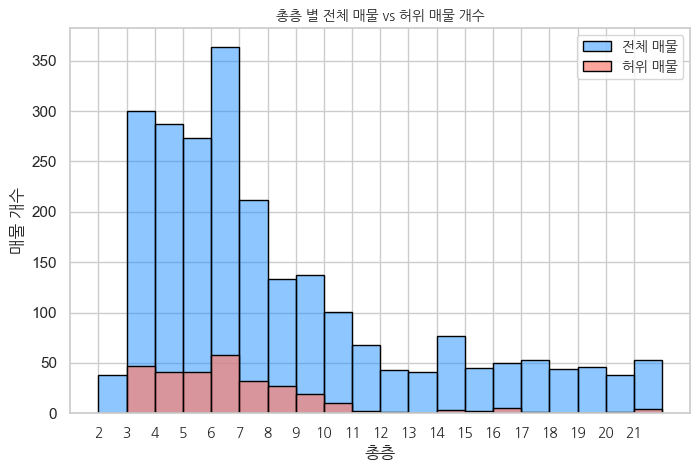

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Seaborn Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_theme(style="whitegrid")

# üìå ÏÉâÏÉÅ ÏÑ§Ï†ï
colors = {"Ï†ÑÏ≤¥ Îß§Î¨º": "dodgerblue", "ÌóàÏúÑ Îß§Î¨º": "salmon"}

# üìå Ï¥ùÏ∏µ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
floor_total = train["Ï¥ùÏ∏µ"]
floor_fake = train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 1]["Ï¥ùÏ∏µ"]

# üìä Ï¥ùÏ∏µ ÌûàÏä§ÌÜ†Í∑∏Îû® (Ï†ÑÏ≤¥ Îß§Î¨º vs ÌóàÏúÑ Îß§Î¨º)
plt.figure(figsize=(8, 5))
sns.histplot(floor_total, bins=range(int(floor_total.min()), int(floor_total.max()) + 2),
             color=colors["Ï†ÑÏ≤¥ Îß§Î¨º"], edgecolor="black", alpha=0.5, label="Ï†ÑÏ≤¥ Îß§Î¨º")
sns.histplot(floor_fake, bins=range(int(floor_fake.min()), int(floor_fake.max()) + 2),
             color=colors["ÌóàÏúÑ Îß§Î¨º"], edgecolor="black", alpha=0.7, label="ÌóàÏúÑ Îß§Î¨º")

# üìå XÏ∂ï 1 Îã®ÏúÑÎ°ú ÏÑ§Ï†ï
plt.xticks(range(int(floor_total.min()), int(floor_total.max()) + 1, 1), 
           fontproperties=fontprop, fontsize=10)

# üìå Ï†úÎ™© Î∞è Ï∂ï ÎùºÎ≤® ÏÑ§Ï†ï
plt.title("Ï¥ùÏ∏µ Î≥Ñ Ï†ÑÏ≤¥ Îß§Î¨º vs ÌóàÏúÑ Îß§Î¨º Í∞úÏàò", fontsize=14, fontproperties=fontprop)
plt.xlabel("Ï¥ùÏ∏µ", fontsize=12, fontproperties=fontprop)
plt.ylabel("Îß§Î¨º Í∞úÏàò", fontsize=12, fontproperties=fontprop)
plt.legend(prop=fontprop, fontsize=10)

plt.show()

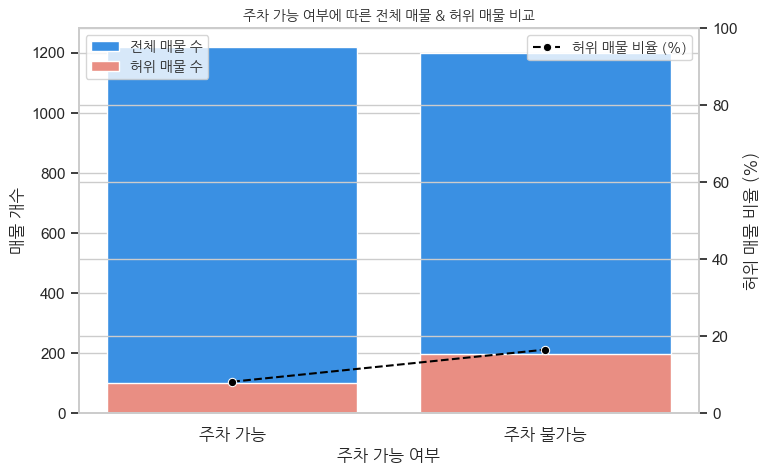

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Seaborn Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_theme(style="whitegrid")

# üìå Ï£ºÏ∞® Í∞ÄÎä• Ïó¨Î∂Ä Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
parking_total = train["Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä"].value_counts()
parking_fake = train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 1]["Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä"].value_counts()

# üìå ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® Í≥ÑÏÇ∞
parking_ratio = (parking_fake / parking_total * 100).fillna(0)

# üìä ÏãúÍ∞ÅÌôî: Ï†ÑÏ≤¥ Îß§Î¨º & ÌóàÏúÑ Îß§Î¨º ÎπÑÍµê
fig, ax1 = plt.subplots(figsize=(8, 5))

# üîπ Ï†ÑÏ≤¥ Îß§Î¨º Í∞úÏàò (ÎßâÎåÄ Í∑∏ÎûòÌîÑ)
sns.barplot(x=parking_total.index, y=parking_total.values, color="dodgerblue", label="Ï†ÑÏ≤¥ Îß§Î¨º Ïàò", ax=ax1)
sns.barplot(x=parking_fake.index, y=parking_fake.values, color="salmon", label="ÌóàÏúÑ Îß§Î¨º Ïàò", ax=ax1)

# üìå XÏ∂ï Ìè∞Ìä∏ Ï†ÅÏö© (Ï£ºÏ∞® Í∞ÄÎä•/Î∂àÍ∞ÄÎä•)
ax1.set_xticklabels(ax1.get_xticklabels(), fontproperties=fontprop, fontsize=12)

# üìå Ï∂ï ÎùºÎ≤® Î∞è Ï†úÎ™© ÏÑ§Ï†ï
ax1.set_ylabel("Îß§Î¨º Í∞úÏàò", fontsize=12, fontproperties=fontprop)
ax1.set_xlabel("Ï£ºÏ∞® Í∞ÄÎä• Ïó¨Î∂Ä", fontsize=12, fontproperties=fontprop)
ax1.set_title("Ï£ºÏ∞® Í∞ÄÎä• Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ï†ÑÏ≤¥ Îß§Î¨º & ÌóàÏúÑ Îß§Î¨º ÎπÑÍµê", fontsize=14, fontproperties=fontprop)

# üîπ ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (ÏÑ† Í∑∏ÎûòÌîÑ)
ax2 = ax1.twinx()
sns.lineplot(x=parking_ratio.index, y=parking_ratio.values, color="black", marker="o", linestyle="dashed", label="ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)", ax=ax2)

# üìå ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® YÏ∂ï ÏÑ§Ï†ï
ax2.set_ylabel("ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® (%)", fontsize=12, fontproperties=fontprop)
ax2.set_ylim(0, 100)  # ÎπÑÏú® Î≤îÏúÑ ÏÑ§Ï†ï

# üìå XÏ∂ï Î≥ÄÏàò Ìè∞Ìä∏ Ï†ÅÏö© (Ï£ºÏ∞® Í∞ÄÎä• / Î∂àÍ∞ÄÎä•)
ax1.set_xticklabels(["Ï£ºÏ∞® Í∞ÄÎä•", "Ï£ºÏ∞® Î∂àÍ∞ÄÎä•"], fontproperties=fontprop, fontsize=12)

# üìå Î≤îÎ°Ä ÏÑ§Ï†ï
ax1.legend(loc="upper left", fontsize=10, prop = fontprop)
ax2.legend(loc="upper right", fontsize=10, prop = fontprop)

plt.show()

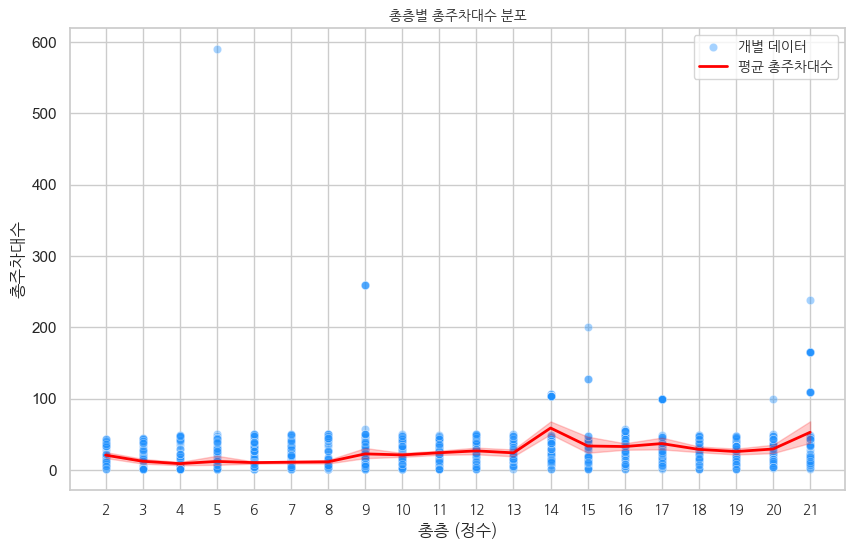

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Í≤∞Ï∏°Ïπò Ï†úÍ±∞
filtered_data = train.dropna(subset=["Ï¥ùÏ∏µ", "Ï¥ùÏ£ºÏ∞®ÎåÄÏàò"]).copy()

# üìå Ï¥ùÏ∏µÏùÑ Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò (ÌòπÏãú floatÏùº Í≤ΩÏö∞ ÎåÄÎπÑ)
filtered_data["Ï¥ùÏ∏µ"] = filtered_data["Ï¥ùÏ∏µ"].astype(int)

# üìä ÏãúÍ∞ÅÌôî: Ï¥ùÏ∏µÎ≥Ñ Ï¥ùÏ£ºÏ∞®ÎåÄÏàò ÏÇ∞Ï†êÎèÑ + ÌèâÍ∑† Ï∂îÏÑ∏ÏÑ†
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data["Ï¥ùÏ∏µ"], y=filtered_data["Ï¥ùÏ£ºÏ∞®ÎåÄÏàò"], alpha=0.4, color="dodgerblue", label="Í∞úÎ≥Ñ Îç∞Ïù¥ÌÑ∞")
sns.lineplot(x=filtered_data["Ï¥ùÏ∏µ"], y=filtered_data["Ï¥ùÏ£ºÏ∞®ÎåÄÏàò"], estimator="mean", color="red", label="ÌèâÍ∑† Ï¥ùÏ£ºÏ∞®ÎåÄÏàò", linewidth=2)

# üìå XÏ∂ïÏùÑ Ï†ïÏàòÌòïÏúºÎ°ú ÏÑ§Ï†ï (1 Îã®ÏúÑ)
plt.xticks(sorted(filtered_data["Ï¥ùÏ∏µ"].unique()), fontproperties=fontprop, fontsize=10)

# üìå Ï†úÎ™© Î∞è Ï∂ï ÎùºÎ≤® (Ìè∞Ìä∏ Ï†ÅÏö©)
plt.title("Ï¥ùÏ∏µÎ≥Ñ Ï¥ùÏ£ºÏ∞®ÎåÄÏàò Î∂ÑÌè¨", fontsize=14, fontproperties=fontprop)
plt.xlabel("Ï¥ùÏ∏µ (Ï†ïÏàò)", fontsize=12, fontproperties=fontprop)
plt.ylabel("Ï¥ùÏ£ºÏ∞®ÎåÄÏàò", fontsize=12, fontproperties=fontprop)

# üìå Î≤îÎ°Ä Ï∂îÍ∞Ä
plt.legend(prop=fontprop, fontsize=10)

plt.show()

- Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå G52Iz8V2B9Îäî ÌóàÏúÑÎß§Î¨ºÏù¥ ÏóÜÎäî Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå

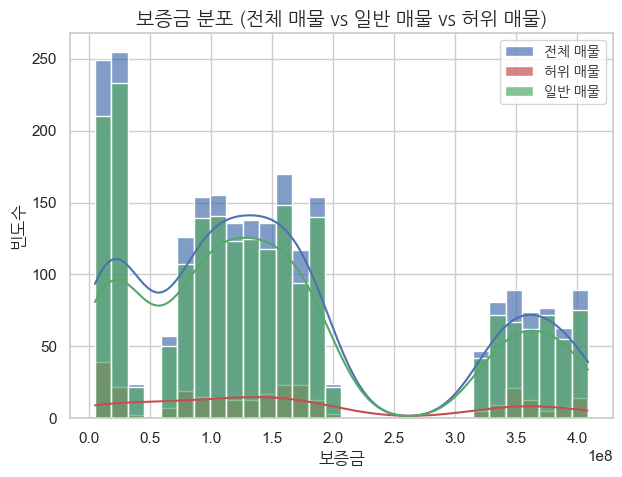

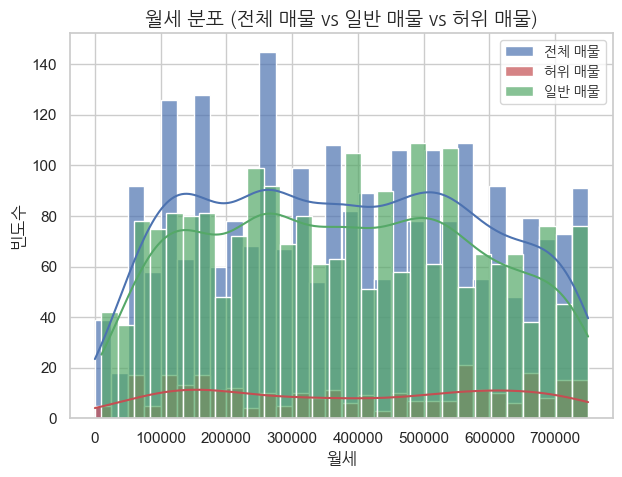

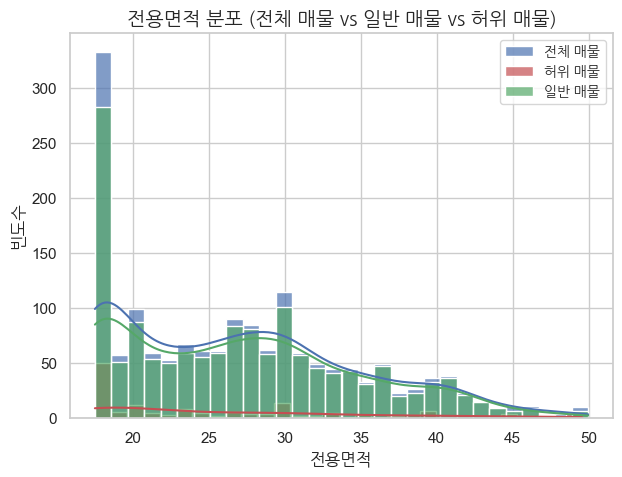

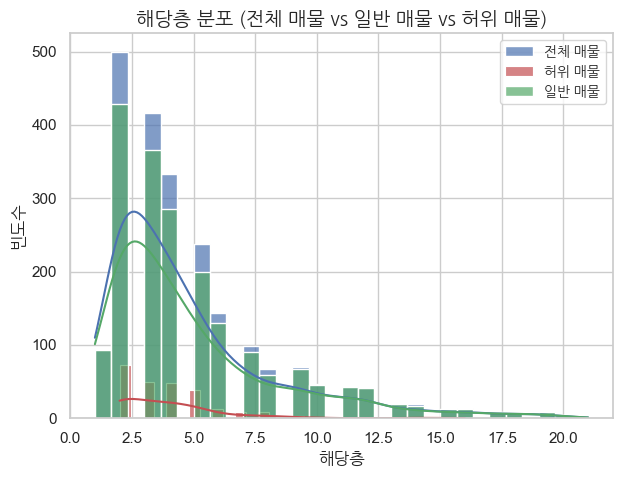

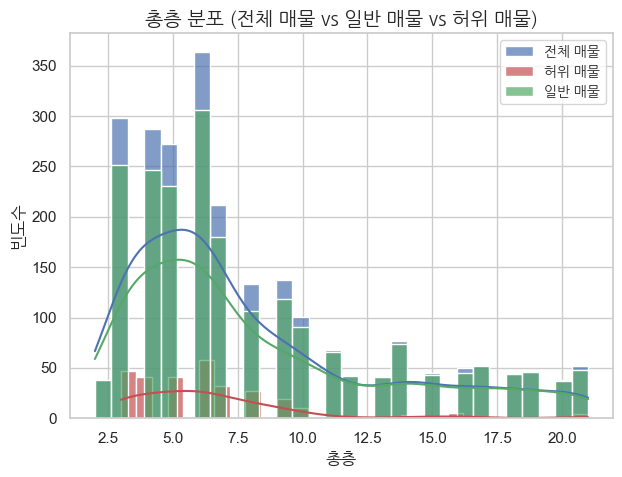

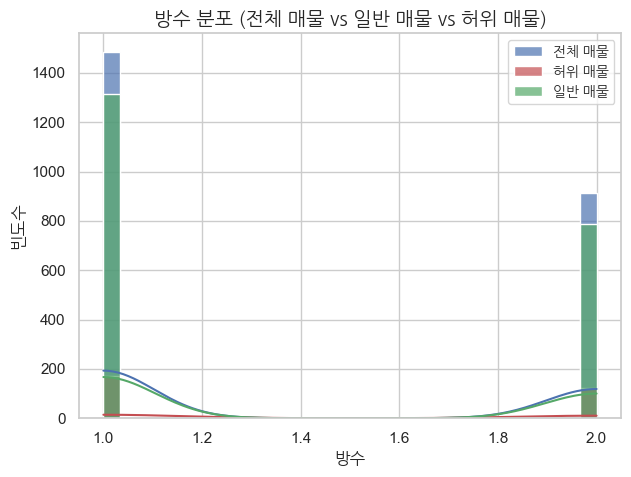

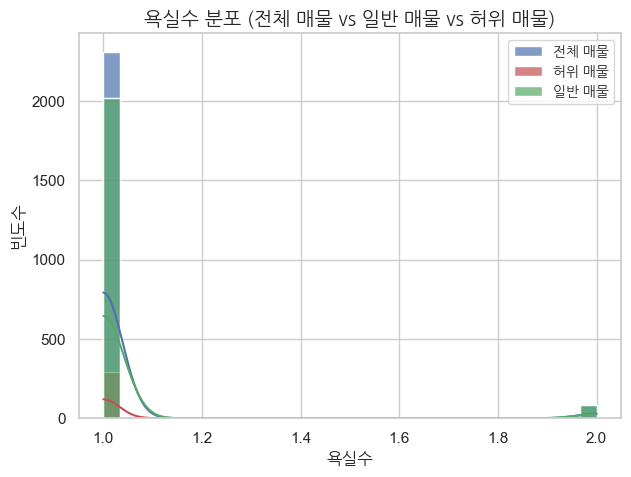

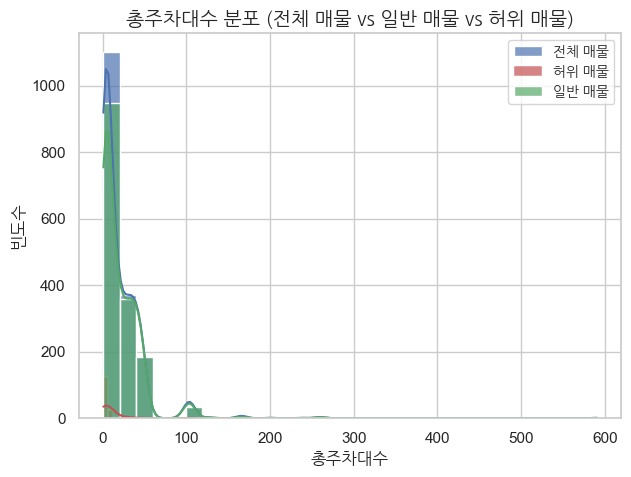

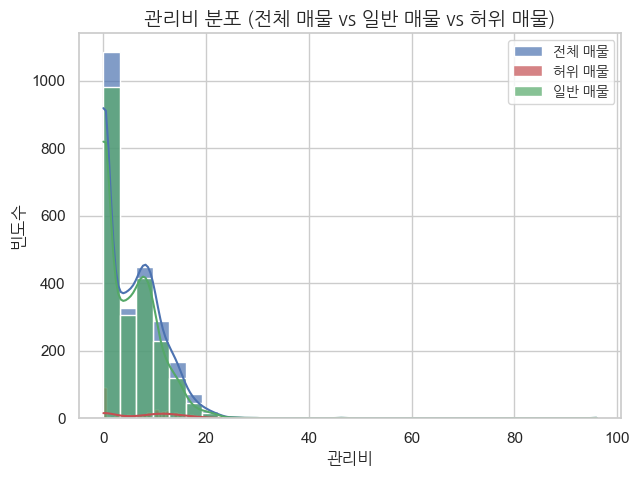

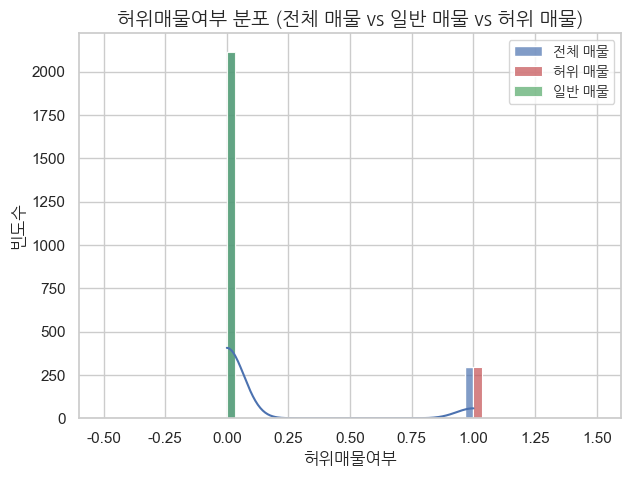

In [ ]:
# üìå Seaborn Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_theme(style="whitegrid")

# üìå ÏàòÏπòÌòï Î≥ÄÏàò ÏÑ†ÌÉù
numeric_columns = train.select_dtypes(include=["float64", "int64"]).columns

# üìå ÏÉâÏÉÅ ÏÑ§Ï†ï (Seaborn deep color palette ÌôúÏö© - Îçî ÏßÑÌïú ÏÉâÏÉÅ)
colors = sns.color_palette("deep")  # ÏßÑÌïú ÏÉâÏÉÅ Ï†ÅÏö©
color_total = colors[0]  # Ï†ÑÏ≤¥ Îß§Î¨º ÏÉâÏÉÅ (ÏßÑÌïú ÌååÎûë)
color_fake = colors[3]   # ÌóàÏúÑ Îß§Î¨º ÏÉâÏÉÅ (ÏßÑÌïú Ï£ºÌô©)
color_real = colors[2]   # ÏùºÎ∞ò Îß§Î¨º ÏÉâÏÉÅ (ÏßÑÌïú Ï¥àÎ°ù)

# üìå Ï†ÑÏ≤¥ Îß§Î¨º, ÌóàÏúÑ Îß§Î¨º, ÏùºÎ∞ò Îß§Î¨º(ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä=0) Î∂ÑÌè¨ ÎπÑÍµê
for col in numeric_columns:
    plt.figure(figsize=(7, 5))
    
    # üî• Ï†ÑÏ≤¥ Îß§Î¨º, ÌóàÏúÑ Îß§Î¨º, ÏùºÎ∞ò Îß§Î¨º Î∂ÑÌè¨Î•º Ìï®Íªò ÏãúÍ∞ÅÌôî
    sns.histplot(train[col], kde=True, bins=30, color=color_total, label="Ï†ÑÏ≤¥ Îß§Î¨º", alpha=0.7)
    sns.histplot(train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 1][col], kde=True, bins=30, color=color_fake, label="ÌóàÏúÑ Îß§Î¨º", alpha=0.7)
    sns.histplot(train[train["ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä"] == 0][col], kde=True, bins=30, color=color_real, label="ÏùºÎ∞ò Îß§Î¨º", alpha=0.7)
    
    # üìå Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î
    plt.title(f"{col} Î∂ÑÌè¨ (Ï†ÑÏ≤¥ Îß§Î¨º vs ÏùºÎ∞ò Îß§Î¨º vs ÌóàÏúÑ Îß§Î¨º)", fontproperties=fontprop, fontsize=14)
    plt.xlabel(col, fontproperties=fontprop, fontsize=12)
    plt.ylabel("ÎπàÎèÑÏàò", fontproperties=fontprop, fontsize=12)

    # üìå Î≤îÎ°Ä (Îçî Î≥¥Í∏∞ Ï¢ãÍ≤å Ï°∞Ï†ï)
    plt.legend(prop=fontprop, fontsize=10, loc="upper right", frameon=True, fancybox=True)

    plt.show()

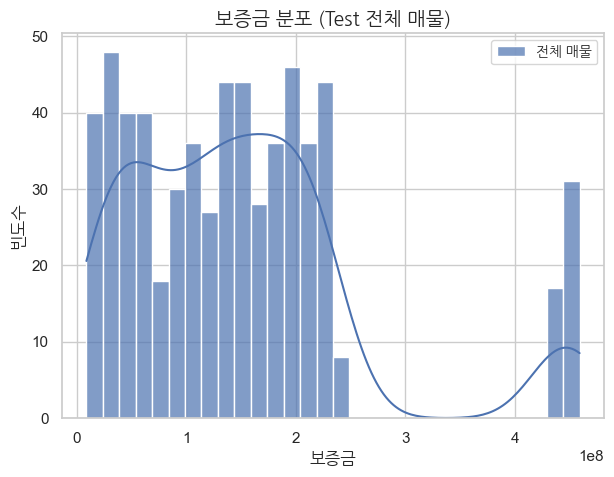

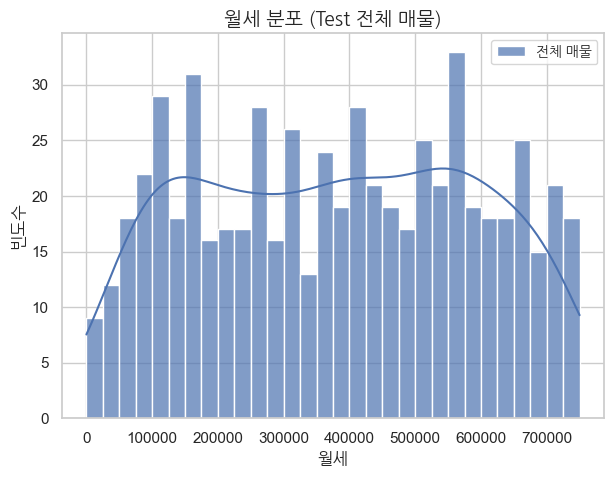

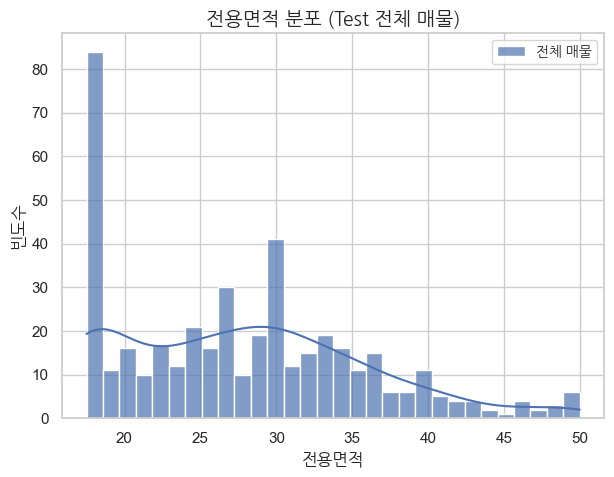

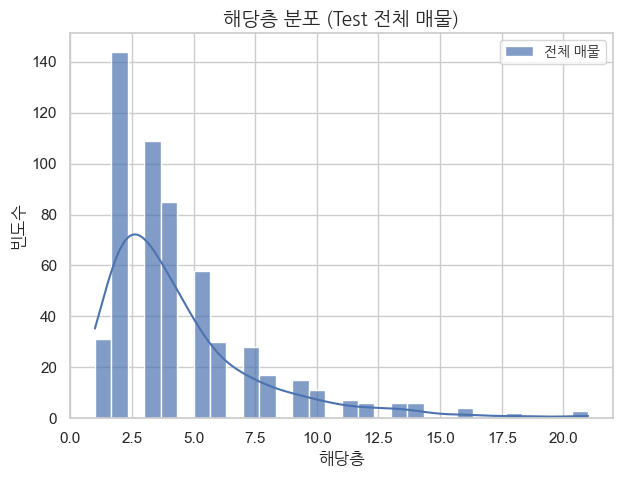

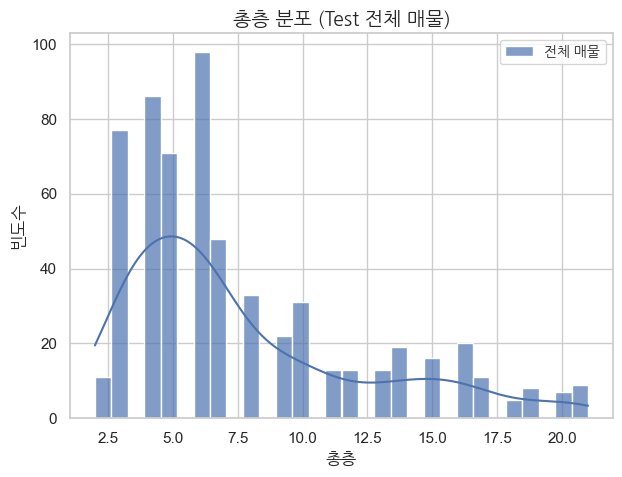

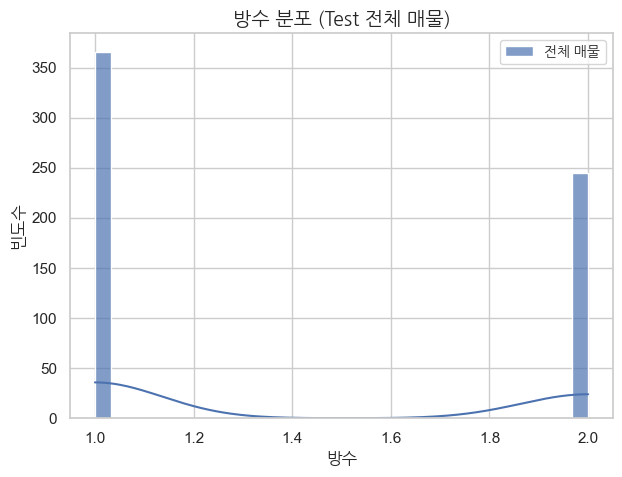

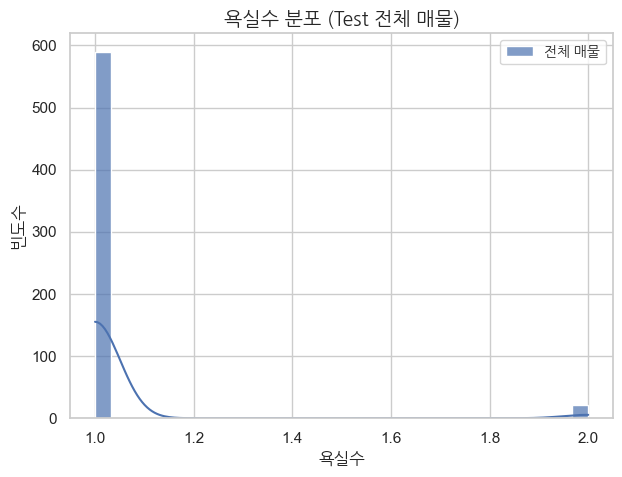

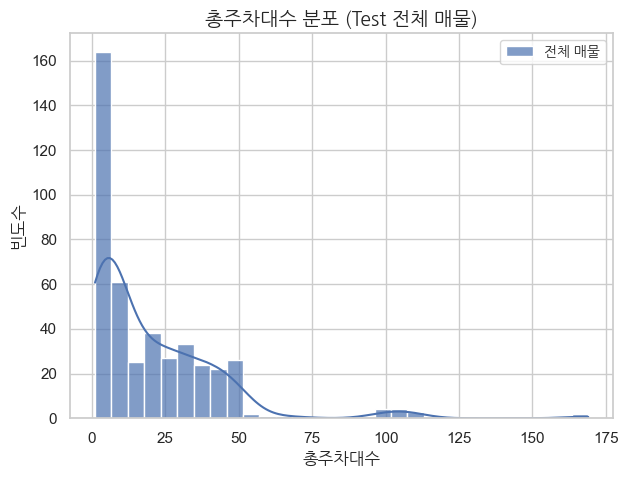

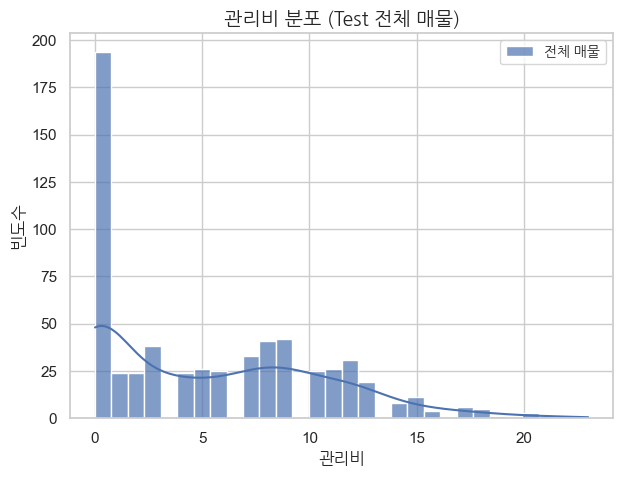

In [69]:
# üìå Seaborn Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_theme(style="whitegrid")

# üìå ÏàòÏπòÌòï Î≥ÄÏàò ÏÑ†ÌÉù
numeric_columns = test.select_dtypes(include=["float64", "int64"]).columns

# üìå ÏÉâÏÉÅ ÏÑ§Ï†ï (Seaborn deep color palette ÌôúÏö© - Îçî ÏßÑÌïú ÏÉâÏÉÅ)
colors = sns.color_palette("deep")  # ÏßÑÌïú ÏÉâÏÉÅ Ï†ÅÏö©
color_total = colors[0]  # Ï†ÑÏ≤¥ Îß§Î¨º ÏÉâÏÉÅ (ÏßÑÌïú ÌååÎûë)

# üìå Ï†ÑÏ≤¥ Îß§Î¨º, ÌóàÏúÑ Îß§Î¨º, ÏùºÎ∞ò Îß§Î¨º(ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä=0) Î∂ÑÌè¨ ÎπÑÍµê
for col in numeric_columns:
    plt.figure(figsize=(7, 5))
    
    # üî• Ï†ÑÏ≤¥ Îß§Î¨º, ÌóàÏúÑ Îß§Î¨º, ÏùºÎ∞ò Îß§Î¨º Î∂ÑÌè¨Î•º Ìï®Íªò ÏãúÍ∞ÅÌôî
    sns.histplot(test[col], kde=True, bins=30, color=color_total, label="Ï†ÑÏ≤¥ Îß§Î¨º", alpha=0.7)
    
    # üìå Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î
    plt.title(f"{col} Î∂ÑÌè¨ (Test Ï†ÑÏ≤¥ Îß§Î¨º)", fontproperties=fontprop, fontsize=14)
    plt.xlabel(col, fontproperties=fontprop, fontsize=12)
    plt.ylabel("ÎπàÎèÑÏàò", fontproperties=fontprop, fontsize=12)

    # üìå Î≤îÎ°Ä (Îçî Î≥¥Í∏∞ Ï¢ãÍ≤å Ï°∞Ï†ï)
    plt.legend(prop=fontprop, fontsize=10, loc="upper right", frameon=True, fancybox=True)

    plt.show()

In [19]:
# # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù (ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞) -> ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í±∞Ïùò Î¨¥Ïì∏Î™®
# plt.figure(figsize=(8, 6))
# sns.heatmap(train[numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
# plt.title("ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù", fontsize=10, fontproperties=fontprop)
# plt.show()

#### ÌóàÏúÑ Îß§Î¨º ÌôïÏù∏

In [20]:
fake_train = train[train['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'] == 1]
print("fake_train Îç∞Ïù¥ÌÑ∞ Ïàò : ", len(fake_train))
print(fake_train.isna().sum())
# ÎÑêÎç∞Ïù¥ÌÑ∞ ÏÉÅÌô© : 298
#     Ï†ÑÏö©Î©¥Ï†Å : 139
#     Ìï¥ÎãπÏ∏µ : 53
#     Ï¥ùÏ∏µ : 4
#     Î∞©Ïàò : 4
#     ÏöïÏã§Ïàò : 4
#     Ï¥ùÏ£ºÏ∞®ÎåÄÏàò : 122

fake_train Îç∞Ïù¥ÌÑ∞ Ïàò :  298
ID          0
Îß§Î¨ºÌôïÏù∏Î∞©Ïãù      0
Î≥¥Ï¶ùÍ∏à         0
ÏõîÏÑ∏          0
Ï†ÑÏö©Î©¥Ï†Å      139
Ìï¥ÎãπÏ∏µ        53
Ï¥ùÏ∏µ          4
Î∞©Ìñ•          0
Î∞©Ïàò          4
ÏöïÏã§Ïàò         4
Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä      0
Ï¥ùÏ£ºÏ∞®ÎåÄÏàò     122
Í¥ÄÎ¶¨ÎπÑ         0
Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå       0
Ï†úÍ≥µÌîåÎû´Ìèº       0
Í≤åÏû¨Ïùº         0
ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä      0
dtype: int64



Î≤îÏ£ºÌòï Î≥ÄÏàò ÏãúÍ∞ÅÌôî:


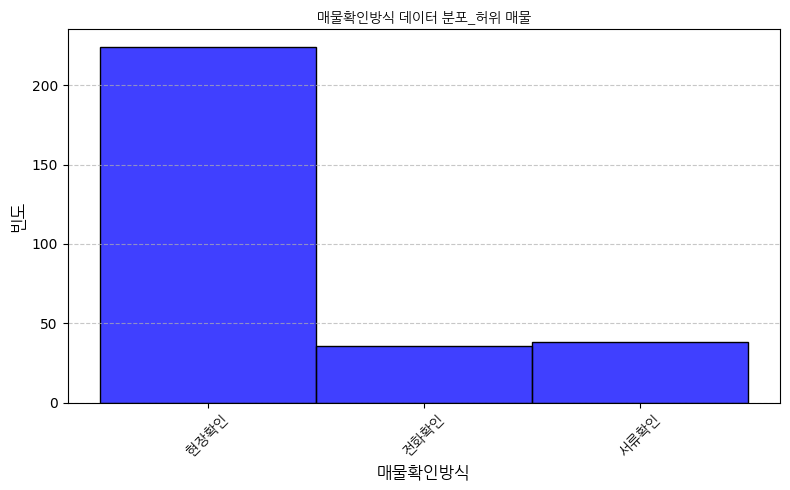

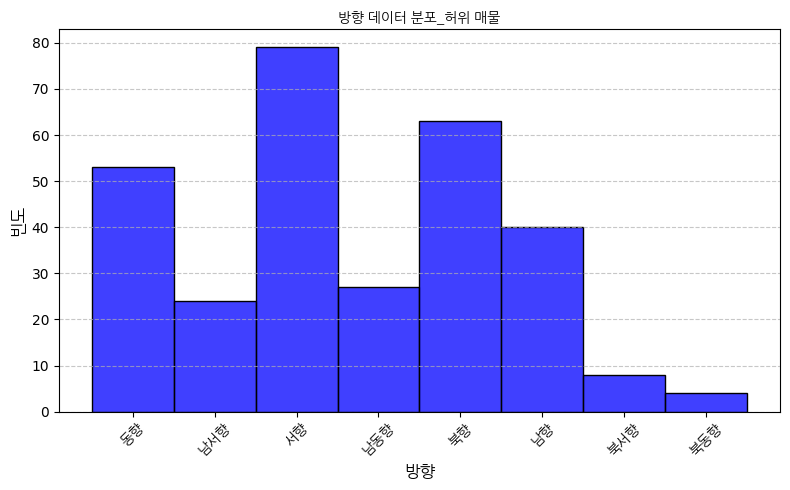

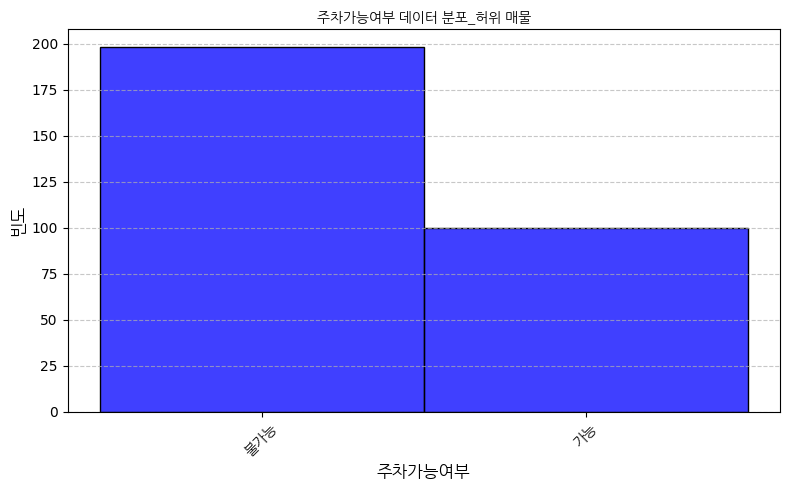

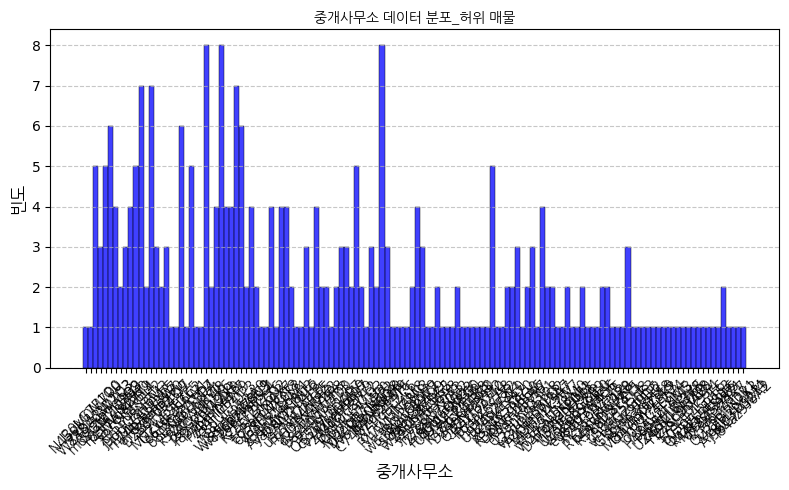

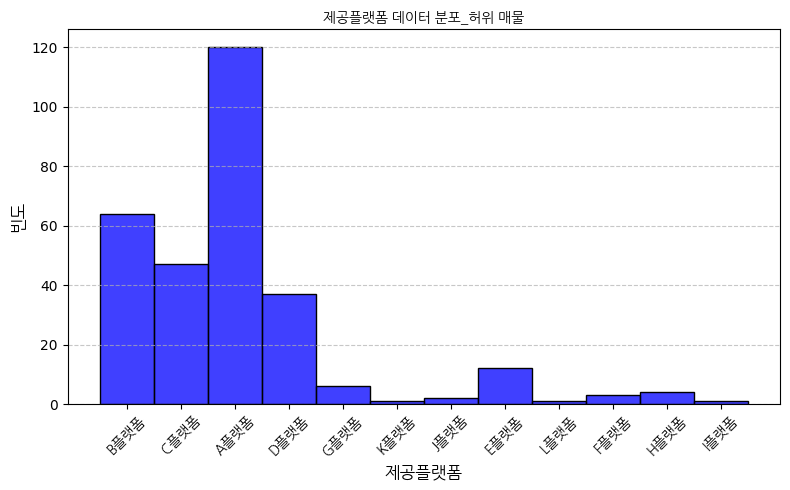

In [21]:
print("\nÎ≤îÏ£ºÌòï Î≥ÄÏàò ÏãúÍ∞ÅÌôî:")
for col in cate_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=fake_train, x=col, kde=False, color="blue", edgecolor="black")
    plt.title(f"{col} Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨_ÌóàÏúÑ Îß§Î¨º", fontsize=14, fontproperties=fontprop)
    plt.xlabel(col, fontsize=12, fontproperties=fontprop)
    plt.ylabel("ÎπàÎèÑ", fontsize=12, fontproperties=fontprop)
    plt.xticks(rotation=45, fontsize=10, fontproperties=fontprop) # XÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ (Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº ÌïÑÏöî)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # YÏ∂ï Ï†êÏÑ† Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
    plt.tight_layout()
    plt.show()

In [22]:
frequent_offices = fake_train['Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå'].value_counts()
frequent_offices = frequent_offices[frequent_offices >= 3].index
fake_train[fake_train['Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå'].isin(frequent_offices)]['Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå'].value_counts()

Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå
J52gJ2E4T6    8
z54Fl0B2P9    8
r82ax9M3U3    8
w85cb3W8U9    7
H90uE4C0W5    7
a15xR3G4V0    7
r16Dr6Z7C3    6
o80Xg3Q1Q7    6
S12iP7V0Q9    6
U93ap2F8Z1    5
M02bn7Y4P0    5
k52HR5N1Z1    5
W88DA3W2Q3    5
j90UQ8N6M3    5
m69GM9O9B3    5
b87Td0W4Y3    4
K25cF2K7X6    4
w94Qb4G0K5    4
y86qM5T6T6    4
A72Mx9C8U2    4
Y65Hw0Z3K0    4
x68FU7B0S3    4
L43HH2L9R7    4
X95Bu4S5H2    4
W88hM2E2A9    4
K86UF7I0P3    4
r74nn1Y4T7    4
w37Qk3B9D2    3
J07Zn4B0R7    3
Z81Jv8Z5G2    3
X71Iq5L2C6    3
M92wE9E7E5    3
C74MD6S8M9    3
s37cv8A6L4    3
D49QC8I7L2    3
z40LO7P9C9    3
D25dP0R4Q9    3
S00TK4T8K2    3
Z18up3D1C3    3
G56AC9J0D6    3
Name: count, dtype: int64

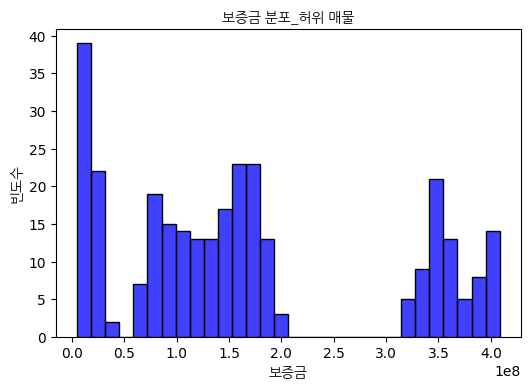

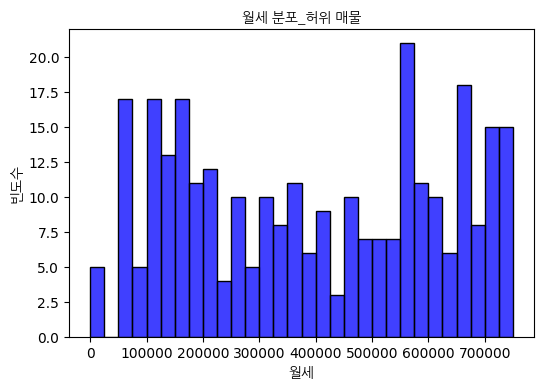

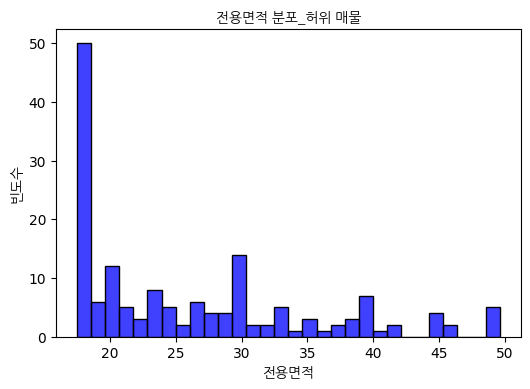

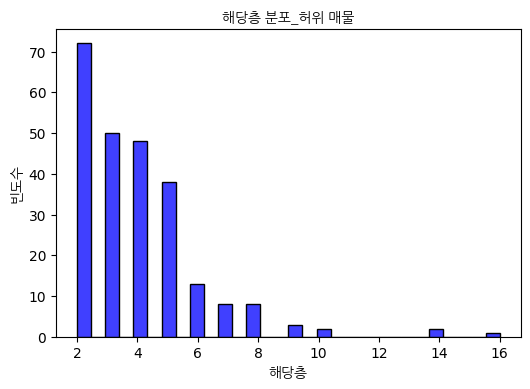

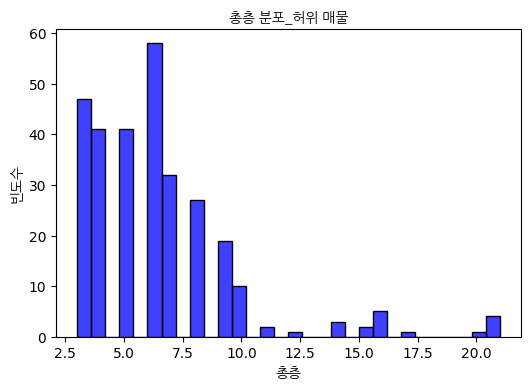

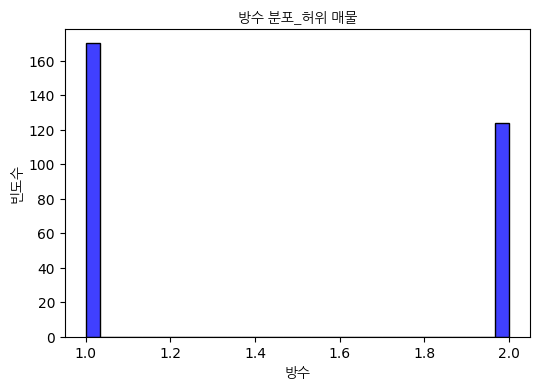

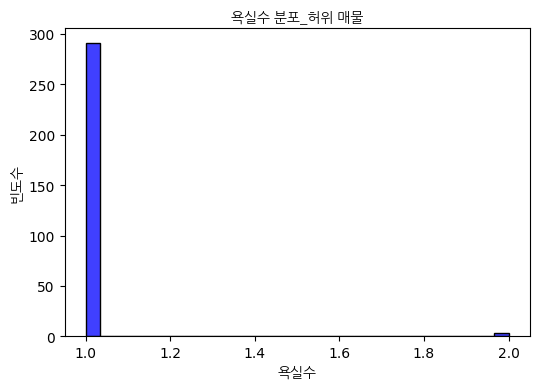

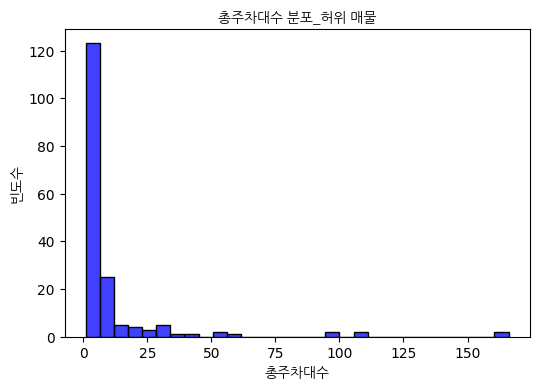

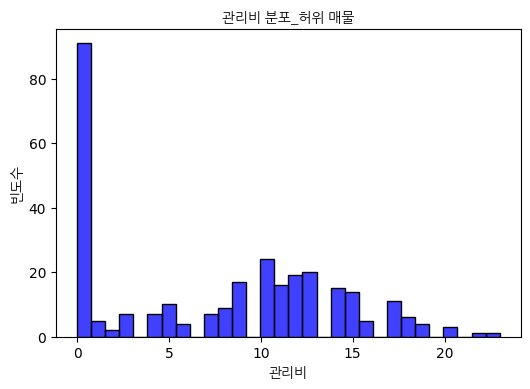

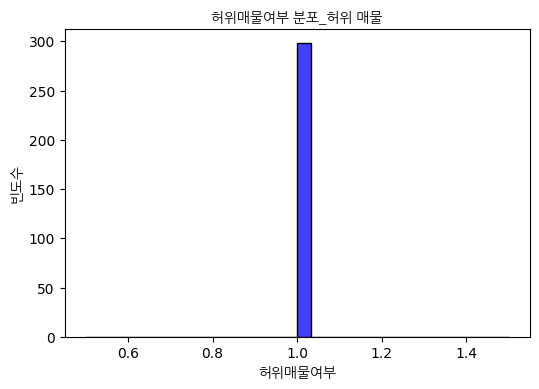

In [23]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(fake_train[col], kde=False, bins = 30, color="blue", edgecolor="black")
    plt.title(f"{col} Î∂ÑÌè¨_ÌóàÏúÑ Îß§Î¨º", fontproperties=fontprop)
    plt.xlabel(col, fontproperties=fontprop)
    plt.ylabel("ÎπàÎèÑÏàò", fontproperties=fontprop)
    plt.show()

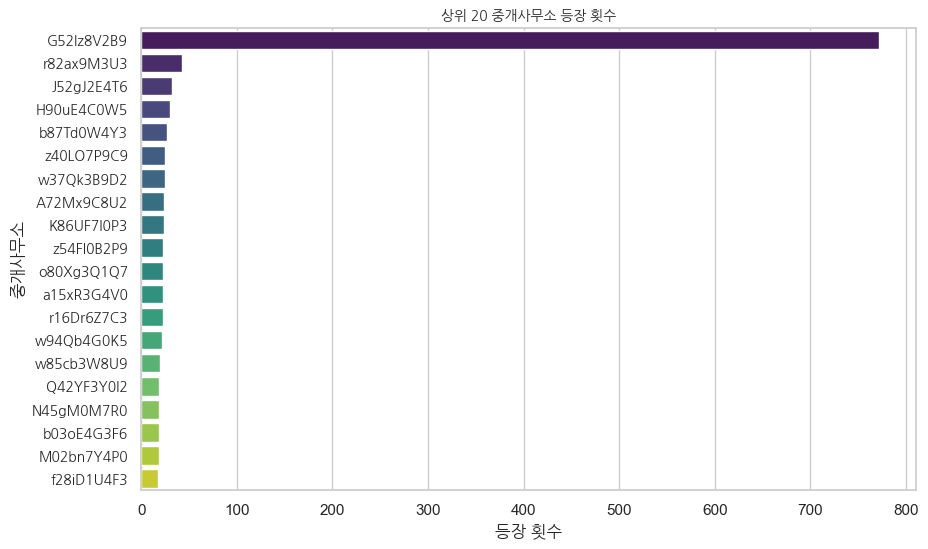

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå Îì±Ïû• ÌöüÏàò Í≥ÑÏÇ∞
agency_counts = train["Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå"].value_counts()

# üìå ÏÉÅÏúÑ NÍ∞ú ÏÑ†ÌÉù (Ïòà: 20Í∞ú)
top_n = 20
top_agencies = agency_counts.head(top_n)

# üìä ÏãúÍ∞ÅÌôî: Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå Îì±Ïû• ÌöüÏàò
plt.figure(figsize=(10, 6))
sns.barplot(y=top_agencies.index, x=top_agencies.values, palette="viridis")

# üìå Ï†úÎ™© Î∞è Ï∂ï ÎùºÎ≤® (Ìè∞Ìä∏ Ï†ÅÏö©)
plt.title(f"ÏÉÅÏúÑ {top_n} Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå Îì±Ïû• ÌöüÏàò", fontsize=14, fontproperties=fontprop)
plt.xlabel("Îì±Ïû• ÌöüÏàò", fontsize=12, fontproperties=fontprop)
plt.ylabel("Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå", fontsize=12, fontproperties=fontprop)

# üìå Ìè∞Ìä∏ Ï†ÅÏö© (YÏ∂ï Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå Ïù¥Î¶Ñ)
plt.yticks(fontproperties=fontprop, fontsize=10)

plt.show()

# Ï†ÑÏ≤òÎ¶¨

## Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

### Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ EDA

- Í≤∞Ï∏°Ïπò Ï†úÍ±∞ Ï†ÑÎûµ
    - Ï†ÑÏö©Î©¥Ï†Å Ï†ÑÏ≤òÎ¶¨ -> Î≥¥Ï¶ùÍ∏à & ÏõîÏÑ∏
        - Ïú†ÏÇ¨ Îß§Î¨º ÌèâÍ∑† ÎåÄÏ≤¥ -> Ïú†ÏÇ¨ Îß§Î¨ºÏù¥ÎùºÍ≥† ÌåêÎã®Ìï† ÎßåÌïú Í∑ºÍ±∞Í∞Ä ÎßéÏßÄÍ∞Ä ÏïäÏùå
            - ÏÉùÍ∞Å Ï¢Ä Ìï¥Î≥¥Î©¥ Î≥ÄÏàòÎì§ Ï§ëÏóêÏÑú ['Ï¥ùÏ∏µ', 'Î∞©Ìñ•', 'Ï¥ùÏ£ºÏ∞®ÎåÄÏàò', 'Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå', 'Ï†úÍ≥µÌîåÎû´Ìèº'] Îì±Ïù¥ ÎòëÍ∞ôÏúºÎ©¥ Ïú†ÏÇ¨ Îß§Î¨º(or Í∞ôÏùÄ Îß§Î¨º)Î°ú ÌåêÎã®?
        - Î≥¥Ï¶ùÍ∏à & ÏõîÏÑ∏ ÎπÑÏú® ÌôúÏö© -> Ïù¥Í≤å Í∑∏ÎÇòÎßà Í∞ÄÏû• Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑ Î≥¥Ïù¥Îäî Î∞©ÏãùÏù∏ ÎìØ
            - Î≥¥Ï¶ùÍ∏à & ÏõîÏÑ∏ ÎπÑÏú®ÏùÑ ÌôúÏö©Ìï¥ÏÑú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌïòÏó¨ Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò meanÍ∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
        - ÌöåÍ∑Ä Î™®Îç∏ ÏÇ¨Ïö© -> Îã§Î•∏ Í≤∞Ï∏°ÏπòÎì§Ïù¥ Îòê Î¨∏Ï†úÎãà Ìå®Ïä§
    - Ìï¥ÎãπÏ∏µ Í≤∞Ï∏°Ïπò Ï†ÑÏ≤òÎ¶¨ -> Î≥¥Ï¶ùÍ∏à & ÏõîÏÑ∏
        - Ï¥ùÏ∏µÏùò Ï§ëÏïôÍ∞íÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨? -> Ïùå Í∑∏Îã•? Ïò§Î•òÍ∞Ä ÎÑàÎ¨¥ ÎßéÏùÑ Í±∞ Í∞ôÏùÄÎç∞
            - Í∑∏ÎÉ• Ìï¥ÎãπÏ∏µÏùÄ Î≤ÑÎ¶¥Íπå?
        - ÏïÑÎãò, ÏõîÏÑ∏ & Î≥¥Ï¶ùÍ∏à Îëê Í∞úÎßåÏùò Î≥ÄÏàòÎ°ú Ìï¥ÎãπÏ∏µÏùÑ ÏòàÏ∏°Ìï¥Î≥¥Í≥† ACC 85% Ïù¥ÏÉÅÏù¥ ÏïÑÎãàÎ©¥ Î≤ÑÎ¶¨Í∏∞Î°ú ÌïòÏûê
    - Ï¥ùÏ∏µ Í≤∞Ï∏°Ïπò Ï†ÑÏ≤òÎ¶¨ ->Î≥¥Ï¶ùÍ∏à & ÏõîÏÑ∏ & Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå
        - Ï†ÑÏö©Î©¥Ï†ÅÏ≤òÎüº Ïú†ÏÇ¨ Îß§Î¨ºÏùò ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥? (Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜåÍ∞Ä Í∞ôÏúºÎ©¥ Í∞ÄÍπåÏù¥Ïóê ÏûàÎäî Îß§Î¨ºÏùº Í≤É, ÎπÑÏä∑Ìïú Í±¥Î¨ºÎì§ÎÅºÎ¶¨ Î™®Ïó¨ÏûàÏùÑ Ïàò ÏûàÎã§Îäî Í∞ÄÏ†ïÌïòÏóê ÏßÑÌñâ) -> Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥Ï†∏ Î≥¥ÏûÑ
        - Í∑∏ÎÉ• Î≤ÑÎ¶¨Í∏∞ÏóêÎäî ÏïÑÍπåÏö¥Í≤å Ï¥ùÏ∏µÏù¥ ÌÅ¥ÏàòÎ°ù (Í±¥Î¨ºÏùò ÎÜíÏù¥Í∞Ä ÎÜíÏùÑÏàòÎ°ù) ÌóàÏúÑ Îß§Î¨ºÏùº ÌôïÎ•†Ïù¥ Îñ®Ïñ¥Ïßà Í≤É Í∞ôÏùÄ ÎäêÎÇå?
            - ÎåÄÌòïÍ±¥Î¨ºÎ°ú Í∞ÄÎùº ÏπòÎäîÍ±¥ Ï¢Ä ÌûòÎì§ÏßÄ ÏïäÏùÑ Íπå?
    - Î∞©Ïàò -> Î≥¥Ï¶ùÍ∏à & ÏõîÏÑ∏ & Ï†ÑÏö©Î©¥Ï†Å
        - Î≥¥Ï¶ùÍ∏à & ÏõîÏÑ∏ & Ï†ÑÏö©Î©¥Ï†ÅÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÌïòÏó¨ Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÏµúÎπàÍ∞íÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
            - Î∞©Ïàò Í≤∞Ï∏°Ïπò o + Ï†ÑÏö©Î©¥Ï†Å Í≤∞Ï∏°Ïπò oÏùò ÎπÑÏú®ÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≥† Í≤∞Ï†ïÌïòÏûê
    - Ï¥ùÏ£ºÏ∞®ÎåÄÏàò
        - Ï¥ùÏ∏µ & Î≥¥Ï¶ùÍ∏à & ÏõîÏÑ∏ & Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÌÜµÌï¥ ÌèâÍ∑†Í∞íÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
            - Ï¥ùÏ∏µ Í≤∞Ï∏°Ïπò o + Ï¥ùÏ£ºÏ∞®ÎåÄÏàò Í≤∞Ï∏°Ïπò oÏùò ÎπÑÏú®ÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≥† Í≤∞Ï†ï
        - Ï£ºÏ∞®ÎåÄÏàòÎ•º Í∑∏ÎÉ• Ï£ºÏ∞® Í∞ÄÎä• / Î∂àÍ∞ÄÎä• ÏúºÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ÎèÑ Îê† Í≤É Í∞ôÏùå

In [24]:
null_data = train[train.isnull().any(axis=1)]
print("ÎÑêÎç∞Ïù¥ÌÑ∞ Ïàò : ", len(null_data))

missing_data_dict = {}
non_missing_data_dict = {}

for column in train.columns:
    missing_data = train[train[column].isnull()]
    if not missing_data.empty:
        missing_data_dict[column] = missing_data
        # print(f"\n[{column}]Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
        # print(missing_data.head(1))

for column in train.columns:
    non_missing_data = train[train[column].notnull()]  # Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù
    if not non_missing_data.empty:
        non_missing_data_dict[column] = non_missing_data
        # print(f"\n[{column}]Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
        # print(non_missing_data.head(1))


print(" ")
print('Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î≥ÄÏàòÎì§ :',missing_data_dict.keys())

for column in missing_data_dict.keys():
    print(f"\n {column}Ïùò Í≤∞Ï∏°Ïπò Ïàò : ", len(missing_data_dict[f'{column}']))

ÎÑêÎç∞Ïù¥ÌÑ∞ Ïàò :  1178
 
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î≥ÄÏàòÎì§ : dict_keys(['Ï†ÑÏö©Î©¥Ï†Å', 'Ìï¥ÎãπÏ∏µ', 'Ï¥ùÏ∏µ', 'Î∞©Ïàò', 'ÏöïÏã§Ïàò', 'Ï¥ùÏ£ºÏ∞®ÎåÄÏàò'])

 Ï†ÑÏö©Î©¥Ï†ÅÏùò Í≤∞Ï∏°Ïπò Ïàò :  787

 Ìï¥ÎãπÏ∏µÏùò Í≤∞Ï∏°Ïπò Ïàò :  229

 Ï¥ùÏ∏µÏùò Í≤∞Ï∏°Ïπò Ïàò :  16

 Î∞©ÏàòÏùò Í≤∞Ï∏°Ïπò Ïàò :  16

 ÏöïÏã§ÏàòÏùò Í≤∞Ï∏°Ïπò Ïàò :  18

 Ï¥ùÏ£ºÏ∞®ÎåÄÏàòÏùò Í≤∞Ï∏°Ïπò Ïàò :  696


In [25]:
fake_train[fake_train['Ï¥ùÏ£ºÏ∞®ÎåÄÏàò'].isna()]['Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä'].value_counts()
# Ï¥ùÏ£ºÏ∞®ÎåÄÏàòÍ∞Ä Í≤∞Ï∏°ÏπòÏù∏ Í≤ΩÏö∞ Ï£ºÏ∞®Í∞ÄÎä• Ïó¨Î∂ÄÍ∞Ä Î∂àÍ∞ÄÎä•Ïù∏ Í≤ΩÏö∞Í∞Ä ÎßéÏùå -> Ï¥ùÏ£ºÏ∞®ÎåÄÏàòÎ•º drop

Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä
Î∂àÍ∞ÄÎä•    114
Í∞ÄÎä•       8
Name: count, dtype: int64

In [26]:
for column, missing_data in missing_data_dict.items():
    # ÌóàÏúÑ Îß§Î¨º Ïàò Í≥ÑÏÇ∞
    num_false_listings = missing_data[missing_data['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'] == 1].shape[0]
    
    # Ï†ÑÏ≤¥ Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ Ïàò
    total_missing_data = missing_data.shape[0]
    
    # ÌóàÏúÑ Îß§Î¨º ÎπÑÏú® Í≥ÑÏÇ∞
    false_listing_ratio = num_false_listings / total_missing_data * 100 if total_missing_data > 0 else 0
    
    # Í≤∞Í≥º Ï∂úÎ†•
    print(f"[{column}] Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞:")
    print(f" - ÌóàÏúÑ Îß§Î¨º Ïàò: {num_false_listings}")
    print(f" - ÌóàÏúÑ Îß§Î¨º ÎπÑÏú®: {false_listing_ratio:.2f}%")
    print("-" * 50)

[Ï†ÑÏö©Î©¥Ï†Å] Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞:
 - ÌóàÏúÑ Îß§Î¨º Ïàò: 139
 - ÌóàÏúÑ Îß§Î¨º ÎπÑÏú®: 17.66%
--------------------------------------------------
[Ìï¥ÎãπÏ∏µ] Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞:
 - ÌóàÏúÑ Îß§Î¨º Ïàò: 53
 - ÌóàÏúÑ Îß§Î¨º ÎπÑÏú®: 23.14%
--------------------------------------------------
[Ï¥ùÏ∏µ] Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞:
 - ÌóàÏúÑ Îß§Î¨º Ïàò: 4
 - ÌóàÏúÑ Îß§Î¨º ÎπÑÏú®: 25.00%
--------------------------------------------------
[Î∞©Ïàò] Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞:
 - ÌóàÏúÑ Îß§Î¨º Ïàò: 4
 - ÌóàÏúÑ Îß§Î¨º ÎπÑÏú®: 25.00%
--------------------------------------------------
[ÏöïÏã§Ïàò] Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞:
 - ÌóàÏúÑ Îß§Î¨º Ïàò: 4
 - ÌóàÏúÑ Îß§Î¨º ÎπÑÏú®: 22.22%
--------------------------------------------------
[Ï¥ùÏ£ºÏ∞®ÎåÄÏàò] Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞:
 - ÌóàÏúÑ Îß§Î¨º Ïàò: 122
 - ÌóàÏúÑ Îß§Î¨º ÎπÑÏú®: 17.53%
--------------------------------------------------


In [27]:
def fill_missing_with_cosine_similarity_using_dicts(train, missing_data_dict, non_missing_data_dict, feature_columns, top_n=5):
    """
    Í≤∞Ï∏°ÏπòÎ•º ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑÎ•º ÌôúÏö©ÌïòÏó¨ Ï±ÑÏö∞Îäî Ìï®Ïàò.
    Í∏∞Ï°¥Ïóê ÏÉùÏÑ±Îêú missing_data_dictÏôÄ non_missing_data_dictÏùÑ ÌôúÏö©.
    
    Parameters:
    - train: ÏõêÎ≥∏ DataFrame
    - missing_data_dict: Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÎîïÏÖîÎÑàÎ¶¨
    - non_missing_data_dict: Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ ÎîïÏÖîÎÑàÎ¶¨
    - feature_columns: Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞Ìï† ÌîºÏ≤òÎì§Ïùò Ïª¨ÎüºÎ™Ö Î¶¨Ïä§Ìä∏
    - top_n: Ïú†ÏÇ¨ÎèÑ ÏÉÅÏúÑ NÍ∞úÏùò ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏõÄ

    Returns:
    - Í≤∞Ï∏°ÏπòÍ∞Ä Ï±ÑÏõåÏßÑ DataFrame
    """
    df_filled = train.copy()

    for column in missing_data_dict.keys():
        print(f"Processing missing values for [{column}]...")
        
        # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞
        missing_data = missing_data_dict[column]

        # Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞
        if column in non_missing_data_dict:
            non_missing_data = non_missing_data_dict[column]

            for idx in missing_data.index:
                # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌñâÏùò ÌîºÏ≤ò Í∞í
                current_row = missing_data.loc[idx, feature_columns].values.reshape(1, -1)

                # Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌîºÏ≤ò Í∞í
                complete_features = non_missing_data[feature_columns].values

                # ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
                similarities = cosine_similarity(current_row, complete_features).flatten()

                # ÏÉÅÏúÑ NÍ∞ú ÏÑ†ÌÉù
                top_n_indices = np.argsort(similarities)[-top_n:]
                top_n_values = non_missing_data.iloc[top_n_indices][column]

                # Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞ (ÌèâÍ∑†)
                df_filled.at[idx, column] = top_n_values.mean()

    return df_filled

# ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
feature_columns = ['Ï¥ùÏ∏µ', 'Î∞©Ìñ•', 'Ï¥ùÏ£ºÏ∞®ÎåÄÏàò', 'Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå', 'Ï†úÍ≥µÌîåÎû´Ìèº']

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
train_filled = fill_missing_with_cosine_similarity_using_dicts(
    train, 
    missing_data_dict, 
    non_missing_data_dict, 
    feature_columns
)

# Í≤∞Í≥º ÌôïÏù∏
print(train_filled.head())

Processing missing values for [Ï†ÑÏö©Î©¥Ï†Å]...


ValueError: could not convert string to float: 'ÏÑúÌñ•'

## ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù (Target : 0/1)

ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä
0    2154
1     298
Name: count, dtype: int64


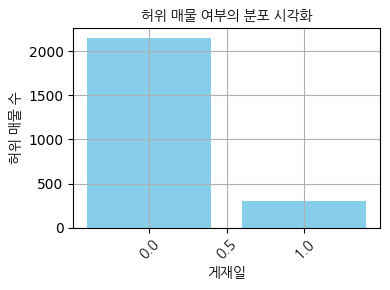

In [28]:
bar_data = train['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'].value_counts()
print(bar_data)
plt.figure(figsize=(4, 3))
plt.bar(bar_data.index, bar_data.values, color='skyblue')
plt.title("ÌóàÏúÑ Îß§Î¨º Ïó¨Î∂ÄÏùò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî", fontsize=12, fontproperties=fontprop)
plt.xlabel("Í≤åÏû¨Ïùº", fontsize=10, fontproperties=fontprop)
plt.ylabel("ÌóàÏúÑ Îß§Î¨º Ïàò", fontsize=10, fontproperties=fontprop)
plt.grid(True)
plt.xticks(rotation=45, fontproperties=fontprop)
plt.tight_layout()
plt.show()

In [29]:
# Í≤åÏû¨ÏùºÏùÑ datetime ÌòïÌÉúÎ°ú Î≥ÄÌôò
train['Í≤åÏû¨Ïùº'] = pd.to_datetime(train['Í≤åÏû¨Ïùº'])

# ÌóàÏúÑÎß§Î¨ºÏó¨Î∂ÄÍ∞Ä 1Ïù∏ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
fraudulent_listings = train[train['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'] == 1]

# Í≤åÏû¨ÏùºÎ≥Ñ ÌóàÏúÑ Îß§Î¨º Ïàò ÏßëÍ≥Ñ
time_series = fraudulent_listings['Í≤åÏû¨Ïùº'].value_counts().sort_index()

# time_seriesÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
time_series = time_series.reset_index()
time_series.columns = ['Í≤åÏû¨Ïùº', 'ÌóàÏúÑ Îß§Î¨º Ïàò']  # Ïó¥ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω

# Í≤åÏû¨ÏùºÏùÑ datetimeÏúºÎ°ú Î≥ÄÌôò
time_series['Í≤åÏû¨Ïùº'] = pd.to_datetime(time_series['Í≤åÏû¨Ïùº'])

# ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
time_series["Í≤åÏû¨Ïõî"] = time_series["Í≤åÏû¨Ïùº"].dt.to_period("M")
monthly_data = time_series.groupby("Í≤åÏû¨Ïõî")["ÌóàÏúÑ Îß§Î¨º Ïàò"].sum().reset_index()

# Î∂ÑÍ∏∞Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
time_series["Í≤åÏû¨Î∂ÑÍ∏∞"] = time_series["Í≤åÏû¨Ïùº"].dt.to_period("Q")
quarterly_data = time_series.groupby("Í≤åÏû¨Î∂ÑÍ∏∞")["ÌóàÏúÑ Îß§Î¨º Ïàò"].sum().reset_index()

# Í≤∞Í≥º ÌôïÏù∏
print("Time Series Data:")
print(time_series)

print("\nMonthly Data:")
print(monthly_data)

print("\nQuarterly Data:")
print(quarterly_data)

Time Series Data:
           Í≤åÏû¨Ïùº  ÌóàÏúÑ Îß§Î¨º Ïàò      Í≤åÏû¨Ïõî    Í≤åÏû¨Î∂ÑÍ∏∞
0   2023-04-28        1  2023-04  2023Q2
1   2023-05-09        1  2023-05  2023Q2
2   2023-06-09        1  2023-06  2023Q2
3   2023-06-21        1  2023-06  2023Q2
4   2023-06-23        1  2023-06  2023Q2
..         ...      ...      ...     ...
198 2024-09-23        1  2024-09  2024Q3
199 2024-09-24        1  2024-09  2024Q3
200 2024-10-06        1  2024-10  2024Q4
201 2024-10-08        2  2024-10  2024Q4
202 2024-11-23        1  2024-11  2024Q4

[203 rows x 4 columns]

Monthly Data:
        Í≤åÏû¨Ïõî  ÌóàÏúÑ Îß§Î¨º Ïàò
0   2023-04        1
1   2023-05        1
2   2023-06        4
3   2023-07        3
4   2023-08       12
5   2023-09       11
6   2023-10       12
7   2023-11       16
8   2023-12       10
9   2024-01        8
10  2024-02        7
11  2024-03       31
12  2024-04       32
13  2024-05       42
14  2024-06       38
15  2024-07       36
16  2024-08       17
17  2024-09       13
18  20

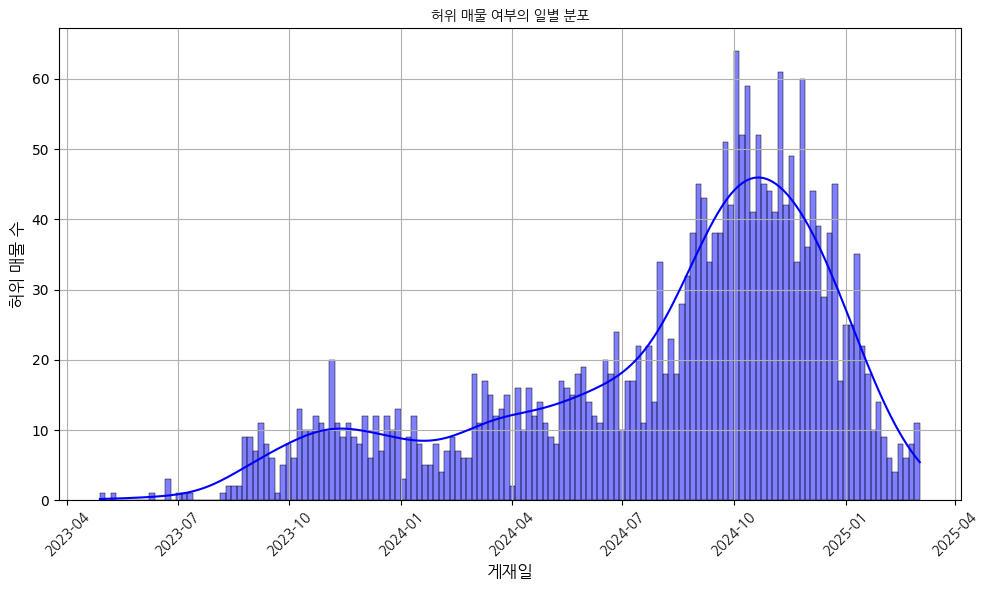

In [30]:
# ÏùºÎ≥Ñ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x="Í≤åÏû¨Ïùº", kde=True, color="blue", bins=150, edgecolor="k")
plt.title("ÌóàÏúÑ Îß§Î¨º Ïó¨Î∂ÄÏùò ÏùºÎ≥Ñ Î∂ÑÌè¨", fontsize=14, fontproperties=fontprop)
plt.xlabel("Í≤åÏû¨Ïùº", fontsize=12, fontproperties=fontprop)
plt.ylabel("ÌóàÏúÑ Îß§Î¨º Ïàò", fontsize=12, fontproperties=fontprop)
plt.grid(True)
plt.xticks(rotation=45, fontproperties=fontprop)
plt.tight_layout()
plt.show()

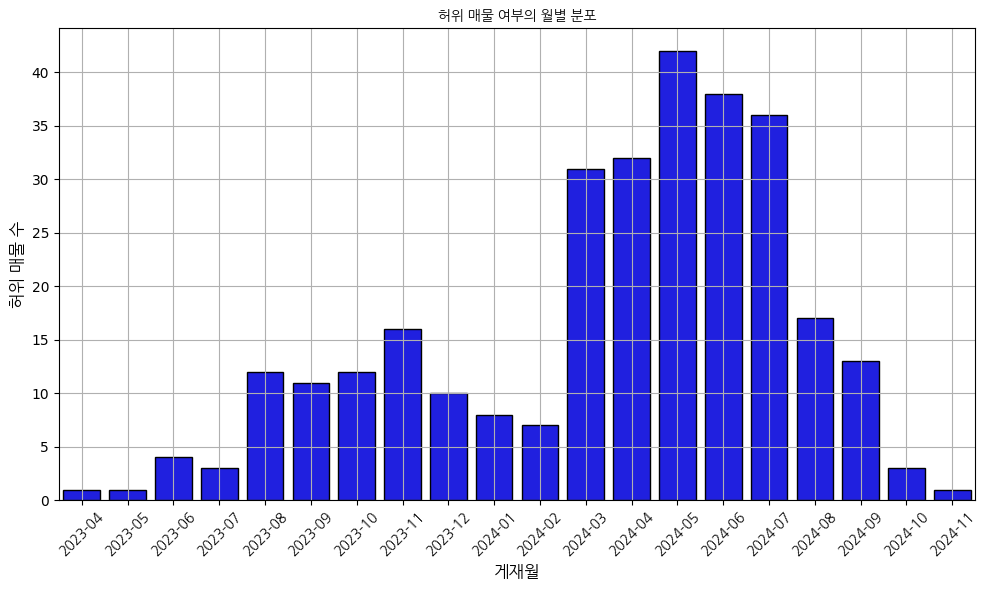

In [31]:
# ÏõîÎ≥Ñ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_data, x="Í≤åÏû¨Ïõî", y="ÌóàÏúÑ Îß§Î¨º Ïàò", color="blue", edgecolor="k")
plt.title("ÌóàÏúÑ Îß§Î¨º Ïó¨Î∂ÄÏùò ÏõîÎ≥Ñ Î∂ÑÌè¨", fontsize=14, fontproperties=fontprop)
plt.xlabel("Í≤åÏû¨Ïõî", fontsize=12, fontproperties=fontprop)
plt.ylabel("ÌóàÏúÑ Îß§Î¨º Ïàò", fontsize=12, fontproperties=fontprop)
plt.grid(True)
plt.xticks(rotation=45, fontproperties=fontprop)
plt.tight_layout()
plt.show()

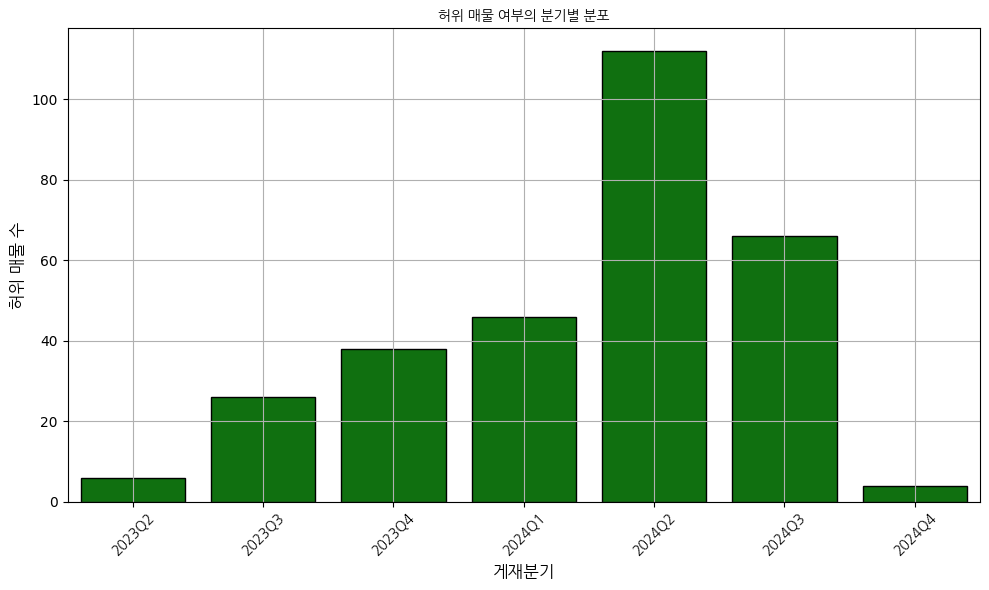

In [32]:
# Î∂ÑÍ∏∞Î≥Ñ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(data=quarterly_data, x="Í≤åÏû¨Î∂ÑÍ∏∞", y="ÌóàÏúÑ Îß§Î¨º Ïàò", color="green", edgecolor="k")
plt.title("ÌóàÏúÑ Îß§Î¨º Ïó¨Î∂ÄÏùò Î∂ÑÍ∏∞Î≥Ñ Î∂ÑÌè¨", fontsize=14, fontproperties=fontprop)
plt.xlabel("Í≤åÏû¨Î∂ÑÍ∏∞", fontsize=12, fontproperties=fontprop)
plt.ylabel("ÌóàÏúÑ Îß§Î¨º Ïàò", fontsize=12, fontproperties=fontprop)
plt.grid(True)
plt.xticks(rotation=45, fontproperties=fontprop)
plt.tight_layout()
plt.show()

# ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù ÎèÑÎ©îÏù∏ Î∂ÑÏÑù Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú

---

## 1. Í∑úÏ†úÏßÄÏó≠ Ìï¥Ï†ú
- 2024ÎÖÑ Ï¥à ÏÑúÏö∏ ÎåÄÎ∂ÄÎ∂Ñ ÏßÄÏó≠Ïù¥ Í∑úÏ†úÏßÄÏó≠ÏóêÏÑú Ìï¥Ï†úÎê®
- Í∑úÏ†úÏßÄÏó≠ Ìï¥Ï†úÎäî Î∂ÄÎèôÏÇ∞ Îß§Îß§ ÌôúÏÑ±ÌôîÎ•º Ï¥âÏßÑ, Ìà¨Ïûê ÏàòÏöîÎ•º Ï¶ùÍ∞ÄÏãúÌÇ¨ Ïàò ÏûàÏùå

### ÌóàÏúÑ Îß§Î¨ºÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•
- **ÌóàÏúÑ Îß§Î¨º Ï¶ùÍ∞Ä Í∞ÄÎä•ÏÑ±**:
  - Í∑úÏ†ú ÏôÑÌôîÎ°ú Îß§Ïàò Ïã¨Î¶¨Í∞Ä Í∞úÏÑ†ÎêòÍ≥† Í±∞ÎûòÍ∞Ä ÌôúÏÑ±ÌôîÎêòÎ©¥, Îß§ÎèÑÏûêÎÇò Ï§ëÍ∞úÏóÖÏûêÎì§Ïù¥ ÌóàÏúÑ Îß§Î¨ºÏùÑ ÌÜµÌï¥ Îçî ÎßéÏùÄ Í¥ÄÏã¨ÏùÑ ÎÅåÎ†§Îäî ÏãúÎèÑÍ∞Ä ÎäòÏñ¥ÎÇ† Ïàò ÏûàÏùå
    - ÌäπÌûà, Ìà¨ÏûêÏûêÎì§Ïù¥ Í∑úÏ†ú Ìï¥Ï†ú ÏßÄÏó≠ÏóêÏÑú Ìà¨Ïûê Í∏∞ÌöåÎ•º Ï∞æÏúºÎ†§Îäî ÏÉÅÌô©ÏóêÏÑú ÌóàÏúÑ Îß§Î¨ºÏù¥ Ï¶ùÍ∞ÄÌï† Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº
- **ÌóàÏúÑ Îß§Î¨º Í≤ΩÏüÅ Ïã¨Ìôî**:
  - Ìï¥Ï†úÎêú ÏßÄÏó≠ÏóêÏÑú Í≤ΩÏüÅÏù¥ ÏπòÏó¥Ìï¥ÏßÄÎ©¥, Í±∞ÎûòÎ•º Ïú†ÎèÑÌïòÍ∏∞ ÏúÑÌï¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Îß§Î¨ºÏùÑ Îì±Î°ùÌïòÎäî ÏÇ¨Î°ÄÍ∞Ä ÎäòÏñ¥ÎÇ† Ïàò ÏûàÏùå

---

## 2. 2024ÎÖÑ Í≥µÏãú Ï£ºÌÉù Í∞ÄÍ≤© Î∞úÌëú
- Í≥µÏãú Ï£ºÌÉù Í∞ÄÍ≤©ÏùÄ ÏÑ∏Í∏àÍ≥º ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Ïó∞Í¥ÄÎêòÏñ¥ Î≥¥Ïú†ÏÑ∏ Î∂ÄÎã¥Ïù¥ ÏôÑÌôîÎêòÍ±∞ÎÇò ÏñëÍ∑πÌôîÍ∞Ä Ïã¨ÌôîÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå

### ÌóàÏúÑ Îß§Î¨ºÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•
- **Í≥†Í∞Ä Ï£ºÌÉù ÌóàÏúÑ Îß§Î¨º Ï¶ùÍ∞Ä Í∞ÄÎä•ÏÑ±**:
  - Í≥µÏãúÍ∞ÄÍ≤© ÌïòÎùΩÏúºÎ°ú Í≥†Í∞Ä Ï£ºÌÉùÏùò Ïã§ÏßàÏ†Å ÎπÑÏö©Ïù¥ Ï§ÑÏñ¥Îì§Î©¥, Í≥†Í∞Ä Ï£ºÌÉù Îß§Î¨ºÏóê ÎåÄÌïú Í¥ÄÏã¨Ïù¥ Ï¶ùÍ∞Ä -> Ïù¥Î•º Ïù¥Ïö©Ìï¥ ÌóàÏúÑ Í≥†Í∞Ä Îß§Î¨ºÏùÑ Ïò¨Î¶¨Îäî ÏÇ¨Î°ÄÍ∞Ä ÎäòÏñ¥ÎÇ† Ïàò ÏûàÏùå
- **Ï†ÄÍ∞Ä Ï£ºÌÉù ÌóàÏúÑ Îß§Î¨º Ï¶ùÍ∞Ä Í∞ÄÎä•ÏÑ±**:
  - Í≥µÏãúÍ∞ÄÍ≤© ÏÉÅÏäπÏúºÎ°ú ÏÑ∏Í∏à Î∂ÄÎã¥Ïù¥ ÎäòÏñ¥ÎÇò Îß§ÎèÑ ÏùòÏßÄÍ∞Ä Ï§ÑÏñ¥ÎìúÎäî ÏÉÅÌô©ÏóêÏÑú Ï§ëÍ∞úÏóÖÏûêÎì§Ïù¥ ÌóàÏúÑ Ï†ÄÍ∞Ä Îß§Î¨ºÏùÑ ÌôúÏö©Ìï¥ Í±∞ÎûòÎ•º Ïú†ÎèÑÌïòÎ†§ Ìï† Ïàò ÏûàÏùå

---

## 3. Î∂ÄÎèôÏÇ∞ Í∑úÏ†ú Î∞è Ï†úÎèÑ Î≥ÄÍ≤Ω
- 2024ÎÖÑÏóêÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Í∑úÏ†úÍ∞Ä ÏòàÏ†ï :
  - LTV(Ï£ºÌÉùÎã¥Î≥¥Ïù∏Ï†ïÎπÑÏú®) Î∞è DTI(Ï¥ùÎ∂ÄÏ±ÑÏÉÅÌôòÎπÑÏú®) Í∑úÏ†úÍ∞Ä Í∞ïÌôî
  - Í≥†Í∞Ä Ï£ºÌÉùÏóê ÎåÄÌïú Ï¢ÖÌï©Î∂ÄÎèôÏÇ∞ÏÑ∏Ïú® ÏÉÅÏäπ

### ÌóàÏúÑ Îß§Î¨ºÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•
- **ÌóàÏúÑ Îß§Î¨º Í∞êÏÜå Í∞ÄÎä•ÏÑ±**:
  - Í∑úÏ†úÍ∞Ä Í∞ïÌôîÎêòÎ©¥ Í±∞ÎûòÎüâ ÏûêÏ≤¥Í∞Ä Ï§ÑÏñ¥Îì§ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏúºÎØÄÎ°ú, ÌóàÏúÑ Îß§Î¨ºÏùò ÌïÑÏöîÏÑ±Ïù¥ ÎÇÆÏïÑÏßà Ïàò ÏûàÏùå
  - ÎåÄÏ∂ú Í∑úÏ†ú Í∞ïÌôîÎ°ú Ïù∏Ìï¥ Ïã§ÏàòÏöîÏûêÎßå ÏãúÏû•Ïóê ÎÇ®ÏùÑ Í≤ΩÏö∞, ÌóàÏúÑ Îß§Î¨ºÏùÑ ÌÜµÌïú Í±∞Îûò Ïú†ÎèÑ Ìö®Í≥ºÍ∞Ä Í∞êÏÜåÌï† Ïàò ÏûàÏùå
- **ÌóàÏúÑ Îß§Î¨º Ï¶ùÍ∞Ä Í∞ÄÎä•ÏÑ±**:
  - Îß§ÎèÑÏûêÎÇò Ï§ëÍ∞úÏóÖÏûêÎì§Ïù¥ Í∑úÏ†úÎ°ú Ïù∏Ìï¥ Îß§ÏàòÏûêÎ•º Ïú†ÏπòÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ ÏÉÅÌô©ÏóêÏÑú ÌóàÏúÑ Îß§Î¨ºÏùÑ ÌÜµÌï¥ Í±∞ÎûòÎ•º Ïú†ÎèÑÌïòÎ†§ Ìï† Ïàò ÏûàÏùå

---

## Ï†ÑÎ∞òÏ†ÅÏù∏ Î∂ÑÏÑù
- **Í∑úÏ†ú ÏôÑÌôî**: ÌóàÏúÑ Îß§Î¨º **Ï¶ùÍ∞Ä ÏöîÏù∏**Ïù¥ Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº
  - Îß§Ïàò Ïã¨Î¶¨ Í∞úÏÑ†Í≥º Í±∞Îûò ÌôúÏÑ±ÌôîÍ∞Ä ÌóàÏúÑ Îß§Î¨º Îì±Î°ù ÎèôÍ∏∞Î•º Í∞ïÌôîÌï† Ïàò ÏûàÏùå
- **Í∑úÏ†ú Í∞ïÌôî**: ÌóàÏúÑ Îß§Î¨ºÏóê **Í∞êÏÜå ÏöîÏù∏**Ïù¥ Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå
  - Í±∞Îûò Í∞êÏÜåÎ°ú ÌóàÏúÑ Îß§Î¨ºÏù¥ Ï§ÑÏñ¥Îì§ Ïàò ÏûàÏßÄÎßå, Í±∞Îûò Ïú†ÎèÑÎ•º ÏúÑÌï¥ ÌóàÏúÑ Îß§Î¨ºÏù¥ Ï¶ùÍ∞ÄÌï† Í∞ÄÎä•ÏÑ±ÎèÑ ÏûàÏùå
- **Í≥µÏãú Ï£ºÌÉù Í∞ÄÍ≤© Î≥ÄÌôî**: 
  - Í≥†Í∞Ä Î∞è Ï†ÄÍ∞Ä Ï£ºÌÉù ÏãúÏû• Î™®ÎëêÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎ©∞, **ÌäπÏ†ï Í∞ÄÍ≤©ÎåÄ**ÏóêÏÑú ÌóàÏúÑ Îß§Î¨ºÏù¥ **ÏßëÏ§ëÏ†ÅÏúºÎ°ú Ï¶ùÍ∞Ä**Ìï† Í∞ÄÎä•ÏÑ±ÏùÑ Í≥†Î†§Ìï¥Ïïº Ìï®

---

## Ï∂îÍ∞Ä Î∂ÑÏÑù Ï†úÏïà
1. **ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù**:
   - ÌóàÏúÑ Îß§Î¨º ÎπàÎèÑÏôÄ Îã§Î•∏ Î≥ÄÏàò(Ïòà: ÏßÄÏó≠, Í∞ÄÍ≤©ÎåÄ, ÌîåÎû´Ìèº Îì±) Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÌôïÏù∏ÌïòÏó¨ Íµ¨Ï≤¥Ï†ÅÏù∏ ÏöîÏù∏ÏùÑ ÌÉêÍµ¨.
2. **ÏãúÍ∞ÑÎ≥Ñ ÏßëÍ≥Ñ**:
   - ÏùºÎ≥ÑÎ≥¥Îã§Îäî **ÏõîÎ≥Ñ**, **Î∂ÑÍ∏∞Î≥Ñ** ÏßëÍ≥ÑÎ•º ÌÜµÌï¥ Ïû•Í∏∞Ï†ÅÏù∏ Ìå®ÌÑ¥ÏùÑ Îçî Î™ÖÌôïÌûà Î∂ÑÏÑù.
3. **Ïù¥Î≤§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä**:
   - Î∂ÄÎèôÏÇ∞ Í¥ÄÎ†® Ï†ïÎ∂Ä Ï†ïÏ±ÖÏù¥ÎÇò Ïù¥Î≤§Ìä∏(Ïòà: Î∂ÄÎèôÏÇ∞ Í∑úÏ†ú Î∞úÌëú, Ïã†Í∑ú Îã®ÏßÄ Î∂ÑÏñë Îì±)Î•º Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞ÄÌïòÏó¨ ÌóàÏúÑ Îß§Î¨ºÏùò Ï¶ùÍ∞ê ÏõêÏù∏ÏùÑ Î∂ÑÏÑù.

---

## Í≤∞Î°†
ÌóàÏúÑ Îß§Î¨ºÏùò Ï¶ùÍ∞êÏùÄ Îã®Ïùº ÏöîÏù∏Ïóê ÏùòÌï¥ÏÑúÍ∞Ä ÏïÑÎãàÎùº, Îã§ÏñëÌïú ÏãúÏû• ÏöîÏù∏Ïùò ÏÉÅÌò∏ÏûëÏö©Ïóê ÏùòÌï¥ Í≤∞Ï†ïÎê©ÎãàÎã§. **Í∑úÏ†ú ÏôÑÌôî**Îäî **ÌóàÏúÑ Îß§Î¨º Ï¶ùÍ∞Ä**Ïùò Ï£ºÏöî ÏöîÏù∏ÏúºÎ°ú ÏûëÏö©Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ¨Î©∞, **Í∑úÏ†ú Í∞ïÌôî**Îäî **ÌóàÏúÑ Îß§Î¨º Í∞êÏÜå**Ïùò Ï£ºÏöî ÏöîÏù∏ÏúºÎ°ú ÏûëÏö©Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå   
-> **ÏõîÎ≥Ñ & Î∂ÑÍ∏∞Î≥ÑÏúºÎ°ú Î∂ÑÎ¶¨ Î∞è Ï†ÑÏ≤òÎ¶¨ ÌïòÏó¨ EDA Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏùå**


In [33]:
train.head()

ID Îß§Î¨ºÌôïÏù∏Î∞©Ïãù          Î≥¥Ï¶ùÍ∏à      ÏõîÏÑ∏  Ï†ÑÏö©Î©¥Ï†Å  Ìï¥ÎãπÏ∏µ    Ï¥ùÏ∏µ   Î∞©Ìñ•   Î∞©Ïàò  ÏöïÏã§Ïàò  \
0  TRAIN_0000   ÌòÑÏû•ÌôïÏù∏  402500000.0  470000   NaN  NaN  15.0   ÏÑúÌñ•  1.0  1.0   
1  TRAIN_0001   ÌòÑÏû•ÌôïÏù∏  170500000.0  200000   NaN  3.0   4.0  ÎÇ®ÎèôÌñ•  2.0  1.0   
2  TRAIN_0002   Ï†ÑÌôîÌôïÏù∏  114000000.0  380000   NaN  2.0   3.0   ÎèôÌñ•  1.0  1.0   
3  TRAIN_0003   ÌòÑÏû•ÌôïÏù∏  163500000.0   30000  36.3  3.0   9.0  ÎÇ®ÎèôÌñ•  2.0  1.0   
4  TRAIN_0004   ÌòÑÏû•ÌôïÏù∏  346000000.0  530000   NaN  3.0   3.0   ÎèôÌñ•  2.0  1.0   

  Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä  Ï¥ùÏ£ºÏ∞®ÎåÄÏàò  Í¥ÄÎ¶¨ÎπÑ       Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå Ï†úÍ≥µÌîåÎû´Ìèº        Í≤åÏû¨Ïùº  ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä  
0     Í∞ÄÎä•   40.0   96  t93Nt6I2I0  BÌîåÎû´Ìèº 2024-10-09       0  
1    Î∂àÍ∞ÄÎä•    NaN    0  q39iV5J4E6  DÌîåÎû´Ìèº 2024-12-26       0  
2    Î∂àÍ∞ÄÎä•    NaN    0  b03oE4G3F6  AÌîåÎû´Ìèº 2024-11-28       0  
3     Í∞ÄÎä•   13.0   10  G52Iz8V2B9  AÌîåÎû´Ìèº 2024-11-26       0  
4    Î∂àÍ∞ÄÎä•    NaN    0  N45gM0M7R0  BÌîåÎû´Ìèº 2024-06-25       1